# cosnova GmbH Data Science – Use Case
This use case is meant primarily to demonstrate your skill set and your ability to implement Data
Science best practices and to communicate your findings clearly. The factual accuracy is not going
to be judged.
Please perform a topline analysis of the effect of the COVID-19 pandemic on the beauty industry. The
analysis should also contain a predictive component. Also include an executive summary of your
findings.
Please document your analysis in a Jupyter notebook hosted on GitHub. The Jupyter notebook
should be self-contained, i.e., all results should be reproducible by executing the Jupyter notebook or
following easy instructions.
You may use any publicly available data sources; please include any supplemental material in the
GitHub repository.
The data collection and implementation within Jupyter should not take longer than 4h. You may
make reasonable assumptions; please shortly justify your assumptions.

### Dataset and Assumptions

####  data 

The data collected from different data resources of cosmetic e-commerce website.

#### Assumptions

For the use case: analysis of the effect of the COVID-19 pandemic on the beauty industry.
    
    
To analyse Covid effect need the data of sales of the cosmetic products in the year 2020 (Covid effect year sales).

To compare the sales of pandemic year need before year sales data so considered 2019 data also.

This dataset is purely for this perticular usecase and deosn't implies any real data.

In this use case tried to show how the sales of products effected in 2020 compared to 2019.

The prediction model is built to predict the price of the product. Model accurecy came as 93% with Random Forest
 and 90% with XGBOOST.

## Creating a new environment

In [ ]:
!python3 -m venv venv
!source venv/bin/activate
!touch requirements.txt
!pip install -r  requirements.txt
!pip freeze


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline



### Reading the data

In [143]:
data = pd.read_csv('Cosmetics_month_sales.csv')
data.head()

id           brand   category                            name  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
1  2044816  Acqua Di Parma    Cologne                         Colonia   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set   

             size  rating  number_of_reviews  love  price  value_price  ...  \
0  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0  ...   
1   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0  ...   
2    5 oz/ 148 mL     4.5                 26  2600  180.0        180.0  ...   
3   2.5 oz/ 74 mL     4.5                 23  2900  120.0        120.0  ...   
4  5 x 0.16oz/5mL     3.5                  2   943   72.0         80.0  ...   

                                          how_to_use  \
0  Suggested Usage:-Fragrance is intensified by t...   
1                                    no instructions   
2                                    no instructions   
3                                    no instructions   
4  Suggested Usage:-Fragrance is intensified by t...   

                                         ingredients online_only exclusive  \
0  Arancia di Capri Eau de Toilette: Alcohol Dena...           1         0   
1                                            unknown           1         0   
2  Alcohol Denat.- Water- Fragrance- Limonene- Li...           1         0   
3                                            unknown           1         0   
4  Colonia: Alcohol Denat.- Water- Fragrance- Lim...           1         0   

  limited_edition limited_time_offer month  year  avg_rev  items_sold  
0               0                  0     2  2020     9213        1378  
1               0                  0     8  2019    15477         937  
2               0                  0    11  2020    21543         257  
3               0                  0    11  2019    20116         292  
4               0                  0     7  2020    15156        1502  

[5 rows x 25 columns]

#### Splitting the data

The data set is gathered using webscraping from Spephora website.

Tha dataset is having 9168 records of Band, Category, Rating, number of reviews, Love, Price, Online only, month, year, Avarage sales per month,number of items sold in a month,year etc.

To analyse how the sales are effected in the year 2020 (Covid effected period):

     Splitting the dataset into two parts , one for 2019 and another with record of 2020

In [144]:
data_2019 = data[data["year"] == 2019]

In [29]:
data_2019.head()

id           brand category                    name           size  \
1   2044816  Acqua Di Parma  Cologne                 Colonia  0.7 oz/ 20 mL   
3   1417617  Acqua Di Parma  Perfume        Mirto di Panarea  2.5 oz/ 74 mL   
5   1417609  Acqua Di Parma  Perfume          Fico di Amalfi   5 oz/ 148 mL   
7   1284462  Acqua Di Parma  Cologne         Colonia Essenza  1.7 oz/ 50 mL   
11  1417633  Acqua Di Parma  Perfume  Bergamotto di Calabria  2.5 oz/ 74 mL   

    rating  number_of_reviews  love  price  value_price  ...       how_to_use  \
1      4.5                 76  2700   66.0         66.0  ...  no instructions   
3      4.5                 23  2900  120.0        120.0  ...  no instructions   
5      4.5                 79  2600  180.0        180.0  ...  no instructions   
7      5.0                 13   719  120.0        120.0  ...  no instructions   
11     4.5                 16  1900  120.0        120.0  ...  no instructions   

                                          ingredients online_only exclusive  \
1                                             unknown           1         0   
3                                             unknown           1         0   
5                                             unknown           1         0   
7   Alcohol Denat.- Water- Fragrance- Limonene- Hy...           1         0   
11                                            unknown           0         0   

   limited_edition limited_time_offer month  year  avg_rev  items_sold  
1                0                  0     8  2019    15477         937  
3                0                  0    11  2019    20116         292  
5                0                  0     9  2019    12571         399  
7                0                  0    12  2019    16388        1204  
11               0                  0    12  2019    17176        1192  

[5 rows x 25 columns]

In [30]:
data_2019.shape

(4679, 25)

In [141]:
data.shape

(9168, 25)

In [31]:
data_2020 = data[data["year"] == 2020]

In [32]:
data_2020.head()

id           brand               category  \
0  2218774  Acqua Di Parma              Fragrance   
2  1417567  Acqua Di Parma                Perfume   
4  2218766  Acqua Di Parma              Fragrance   
6  1638832  Acqua Di Parma                Perfume   
8  2221588  Acqua Di Parma  Body Mist & Hair Mist   

                             name            size  rating  number_of_reviews  \
0  Blu Mediterraneo MINIATURE Set  5 x 0.16oz/5mL     4.0                  4   
2                Arancia di Capri    5 oz/ 148 mL     4.5                 26   
4           Colonia Miniature Set  5 x 0.16oz/5mL     3.5                  2   
6                     Rosa Nobile  3.4 oz/ 101 mL     4.5                 79   
8         Peonia Nobile Hair Mist      1.7oz/50mL     4.0                  5   

   love  price  value_price  ...  \
0  3002   66.0         75.0  ...   
2  2600  180.0        180.0  ...   
4   943   72.0         80.0  ...   
6  5000  210.0        210.0  ...   
8   800   58.0         58.0  ...   

                                          how_to_use  \
0  Suggested Usage:-Fragrance is intensified by t...   
2                                    no instructions   
4  Suggested Usage:-Fragrance is intensified by t...   
6                                    no instructions   
8  Suggested Usage:-Spray over your hair to leave...   

                                         ingredients online_only exclusive  \
0  Arancia di Capri Eau de Toilette: Alcohol Dena...           1         0   
2  Alcohol Denat.- Water- Fragrance- Limonene- Li...           1         0   
4  Colonia: Alcohol Denat.- Water- Fragrance- Lim...           1         0   
6                                            unknown           1         0   
8  Alcohol Denat.- Water- Fragrance- Polyquaterni...           1         0   

  limited_edition limited_time_offer month  year  avg_rev  items_sold  
0               0                  0     2  2020     9213        1378  
2               0                  0    11  2020    21543         257  
4               0                  0     7  2020    15156        1502  
6               0                  0    12  2020    20487         135  
8               0                  0     7  2020    15328        1779  

[5 rows x 25 columns]

In [33]:
data_2020.shape

(4489, 25)

## Understanding of the data




In [7]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4679 entries, 1 to 9167
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4679 non-null   int64  
 1   brand                   4679 non-null   object 
 2   category                4679 non-null   object 
 3   name                    4679 non-null   object 
 4   size                    4679 non-null   object 
 5   rating                  4679 non-null   float64
 6   number_of_reviews       4679 non-null   int64  
 7   love                    4679 non-null   int64  
 8   price                   4679 non-null   float64
 9   value_price             4679 non-null   float64
 10  URL                     4679 non-null   object 
 11  MarketingFlags          4679 non-null   bool   
 12  MarketingFlags_content  4679 non-null   object 
 13  options                 4679 non-null   object 
 14  details                 4679 non-null   

In [35]:
data=data.rename(columns = {'avg_rev':'avg_rev_month'})

In [36]:
data.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer', 'month', 'year',
       'avg_rev_month', 'items_sold'],
      dtype='object')

 From the information above, it shows us:
 
 Dataset has a total of 9168 rows and 25 columns
 
 Dataset2019 has a records of 4679 rows and 25 columns
 
 Dataset2020 has a records of 4489 rows and 25 columns
 
 Target Regression is the column 'avg_rev_month'

In [194]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Exploratory Data Analysis

##### Statistical Summary

In [37]:
data_distribution = data_2019.describe(include =['float64', 'int64', 'float', 'int'])
data_distribution.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

Based on the table above can be seen some columns that have abnormal data distribution 

among them because it has mean values and medians that are far linked.

In [38]:
data_distri_Cat = data_2019.describe(include=["O"])
data_distri_Cat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

### Categorical Value Counting

In [39]:
cats = ['brand','category', 'name', 'size'] 
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data_2019[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION    254
CLINIQUE              113
tarte                  92
TOM FORD               75
Kiehl's Since 1851     73
                     ... 
Prima                   1
Lunar Beauty            1
Google                  1
Fable & Mane            1
Four Sigmatic           1
Name: brand, Length: 305, dtype: int64

Value count kolom category:
Perfume                      332
Moisturizers                 239
Face Serums                  197
Value & Gift Sets            177
Hair Styling Products        121
                            ... 
Powder Brush                   1
Hair Styling & Treatments      1
Accessories                    1
High Tech Tools                1
After Sun Care                 1
Name: category, Length: 140, dtype: int64

Value count kolom name:
Blush                                 3
Cleanser                              2
Rose Quartz Facial Roller             2
Sugar Body Scrub                      2
Full Conditioner               

### Correlation heatmap

In [40]:
data_2019.corr()

id    rating  number_of_reviews      love     price  \
id                  1.000000 -0.173417          -0.154833 -0.100066 -0.037191   
rating             -0.173417  1.000000           0.085475  0.097449  0.037350   
number_of_reviews  -0.154833  0.085475           1.000000  0.750327 -0.084342   
love               -0.100066  0.097449           0.750327  1.000000 -0.087813   
price              -0.037191  0.037350          -0.084342 -0.087813  1.000000   
value_price        -0.014003  0.019365          -0.090019 -0.090719  0.981586   
MarketingFlags      0.280483 -0.111382          -0.104877 -0.064840 -0.055355   
online_only         0.160427 -0.121895          -0.138554 -0.140774  0.109529   
exclusive           0.190998 -0.015047          -0.001098  0.042659 -0.176551   
limited_edition     0.191615 -0.112045          -0.077204 -0.047766  0.019002   
limited_time_offer  0.009876  0.007347          -0.004395 -0.004695 -0.005086   
month               0.018979 -0.011917           0.011499  0.003347  0.025264   
year                     NaN       NaN                NaN       NaN       NaN   
avg_rev            -0.003693 -0.000779           0.019263  0.014266  0.010151   
items_sold          0.015965  0.005959           0.008321  0.013199  0.006887   

                    value_price  MarketingFlags  online_only  exclusive  \
id                    -0.014003        0.280483     0.160427   0.190998   
rating                 0.019365       -0.111382    -0.121895  -0.015047   
number_of_reviews     -0.090019       -0.104877    -0.138554  -0.001098   
love                  -0.090719       -0.064840    -0.140774   0.042659   
price                  0.981586       -0.055355     0.109529  -0.176551   
value_price            1.000000       -0.023870     0.122272  -0.154605   
MarketingFlags        -0.023870        1.000000     0.578160   0.633635   
online_only            0.122272        0.578160     1.000000  -0.067738   
exclusive             -0.154605        0.633635    -0.067738   1.000000   
limited_edition        0.084182        0.332093     0.087455   0.172697   
limited_time_offer    -0.005387        0.015302    -0.008077   0.024150   
month                  0.026571        0.009292    -0.004375   0.006138   
year                        NaN             NaN          NaN        NaN   
avg_rev                0.010438       -0.015197    -0.017828  -0.001028   
items_sold             0.007951        0.003335    -0.013396   0.016424   

                    limited_edition  limited_time_offer     month  year  \
id                         0.191615            0.009876  0.018979   NaN   
rating                    -0.112045            0.007347 -0.011917   NaN   
number_of_reviews         -0.077204           -0.004395  0.011499   NaN   
love                      -0.047766           -0.004695  0.003347   NaN   
price                      0.019002           -0.005086  0.025264   NaN   
value_price                0.084182           -0.005387  0.026571   NaN   
MarketingFlags             0.332093            0.015302  0.009292   NaN   
online_only                0.087455           -0.008077 -0.004375   NaN   
exclusive                  0.172697            0.024150  0.006138   NaN   
limited_edition            1.000000            0.046078  0.031029   NaN   
limited_time_offer         0.046078            1.000000  0.019185   NaN   
month                      0.031029            0.019185  1.000000   NaN   
year                            NaN                 NaN       NaN   NaN   
avg_rev                    0.026815            0.022755 -0.003640   NaN   
items_sold                 0.002961           -0.012946  0.020634   NaN   

                     avg_rev  items_sold  
id                 -0.003693    0.015965  
rating             -0.000779    0.005959  
number_of_reviews   0.019263    0.008321  
love                0.014266    0.013199  
price               0.010151    0.006887  
value_price         0.010438    0.007951  
MarketingFlags     -0.0151

(10.5, -0.5)

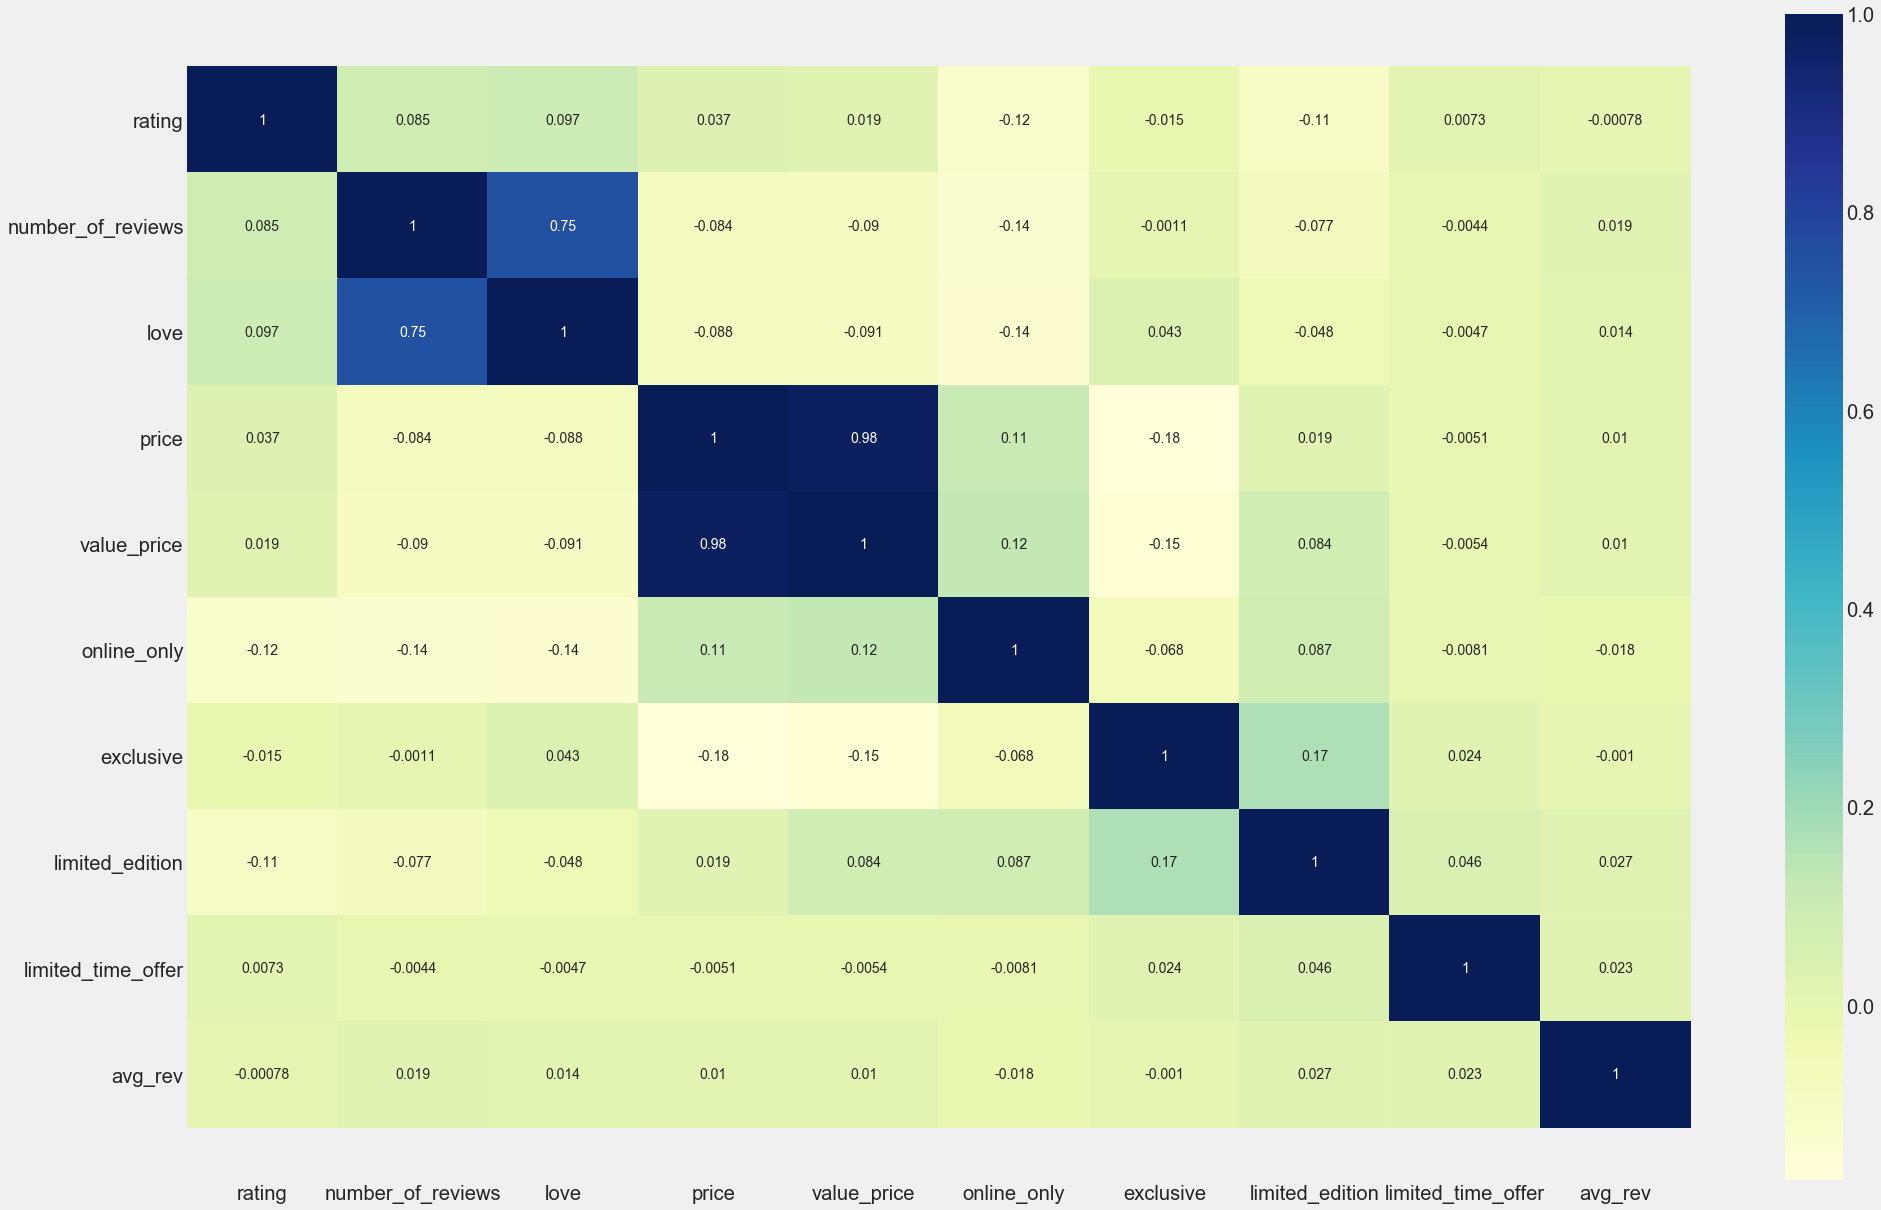

In [42]:
features = ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer', 'avg_rev']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = data_2019[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

###  From Correlation Heatmap

Based on the picture above can be seen that the 'price' and 'value_price' features have a correlation of 0.96, then it is necessary to check!

'love' and 'number_of_review' features can also be seen to have a fairly high correlation value of 0.75.

### Scatterplot

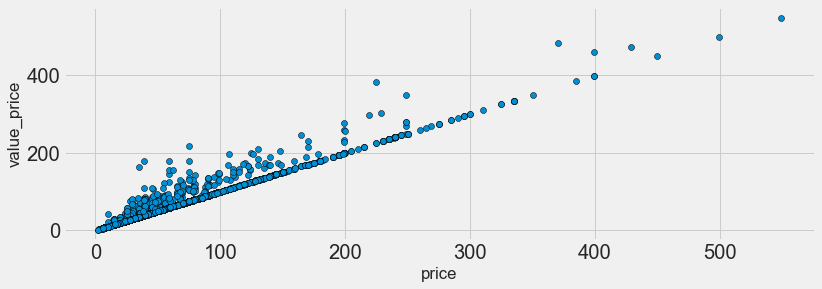

In [43]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data_2019['price'], y=data_2019['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

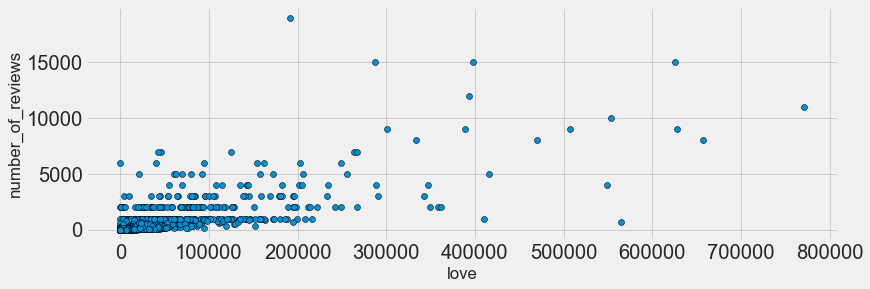

In [44]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data_2019['love'], y=data_2019['number_of_reviews'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="love", ylabel="number_of_reviews")

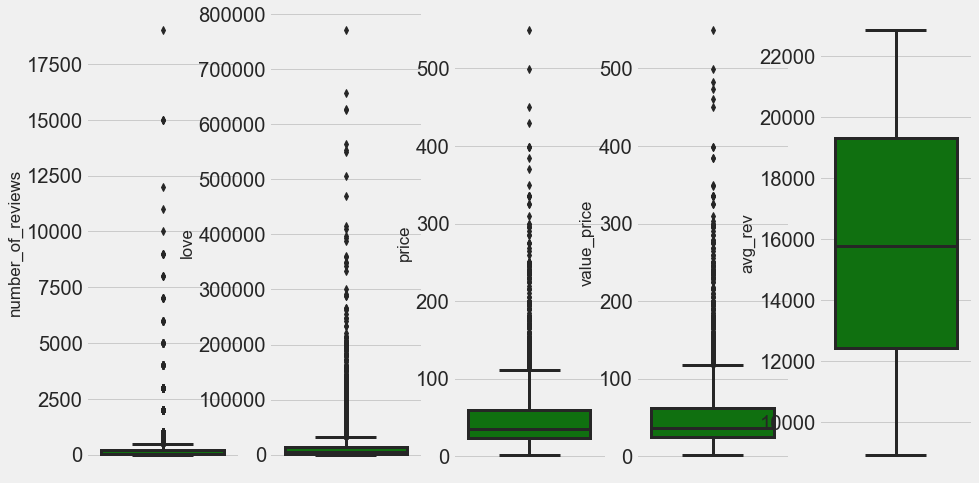

In [46]:
features = ['number_of_reviews', 'love', 'price', 'value_price','avg_rev']
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data_2019[features[i]],color='green',orient='v')

##  Checking the "value_price" distribution

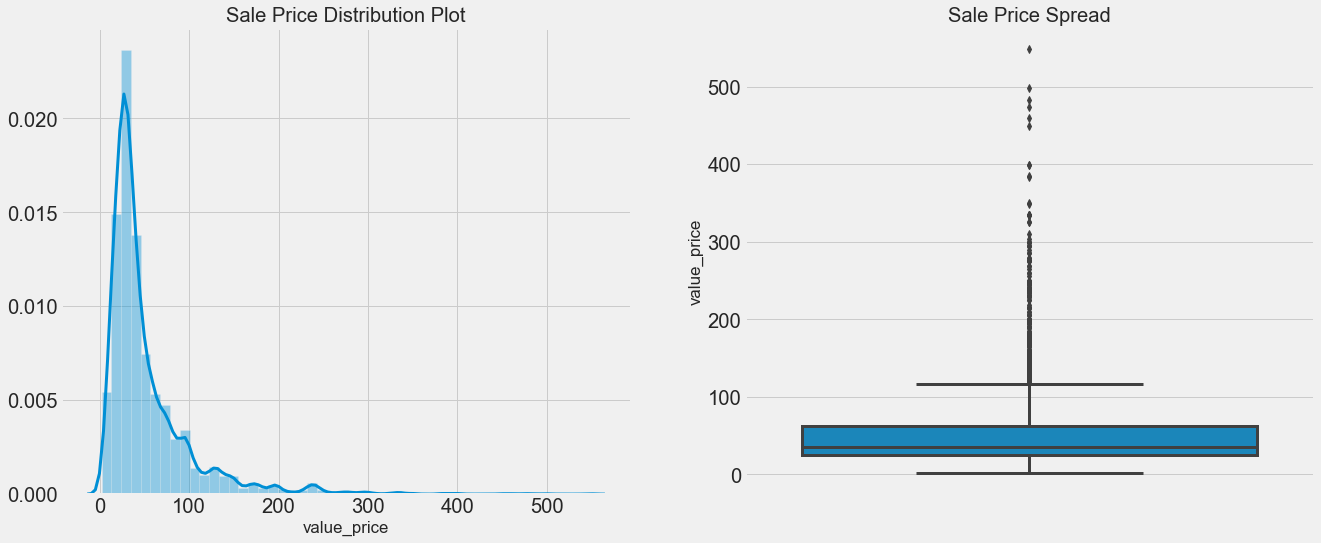

In [48]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(data_2019.value_price)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=data_2019.value_price)

plt.show()

In [52]:
print(data_2019.value_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    4679.000000
mean       52.395003
std        49.934295
min         2.000000
25%        25.000000
50%        36.000000
75%        62.000000
85%        88.000000
90%       105.000000
100%      549.000000
max       549.000000
Name: value_price, dtype: float64


Skewness Co-efficient: 3.089


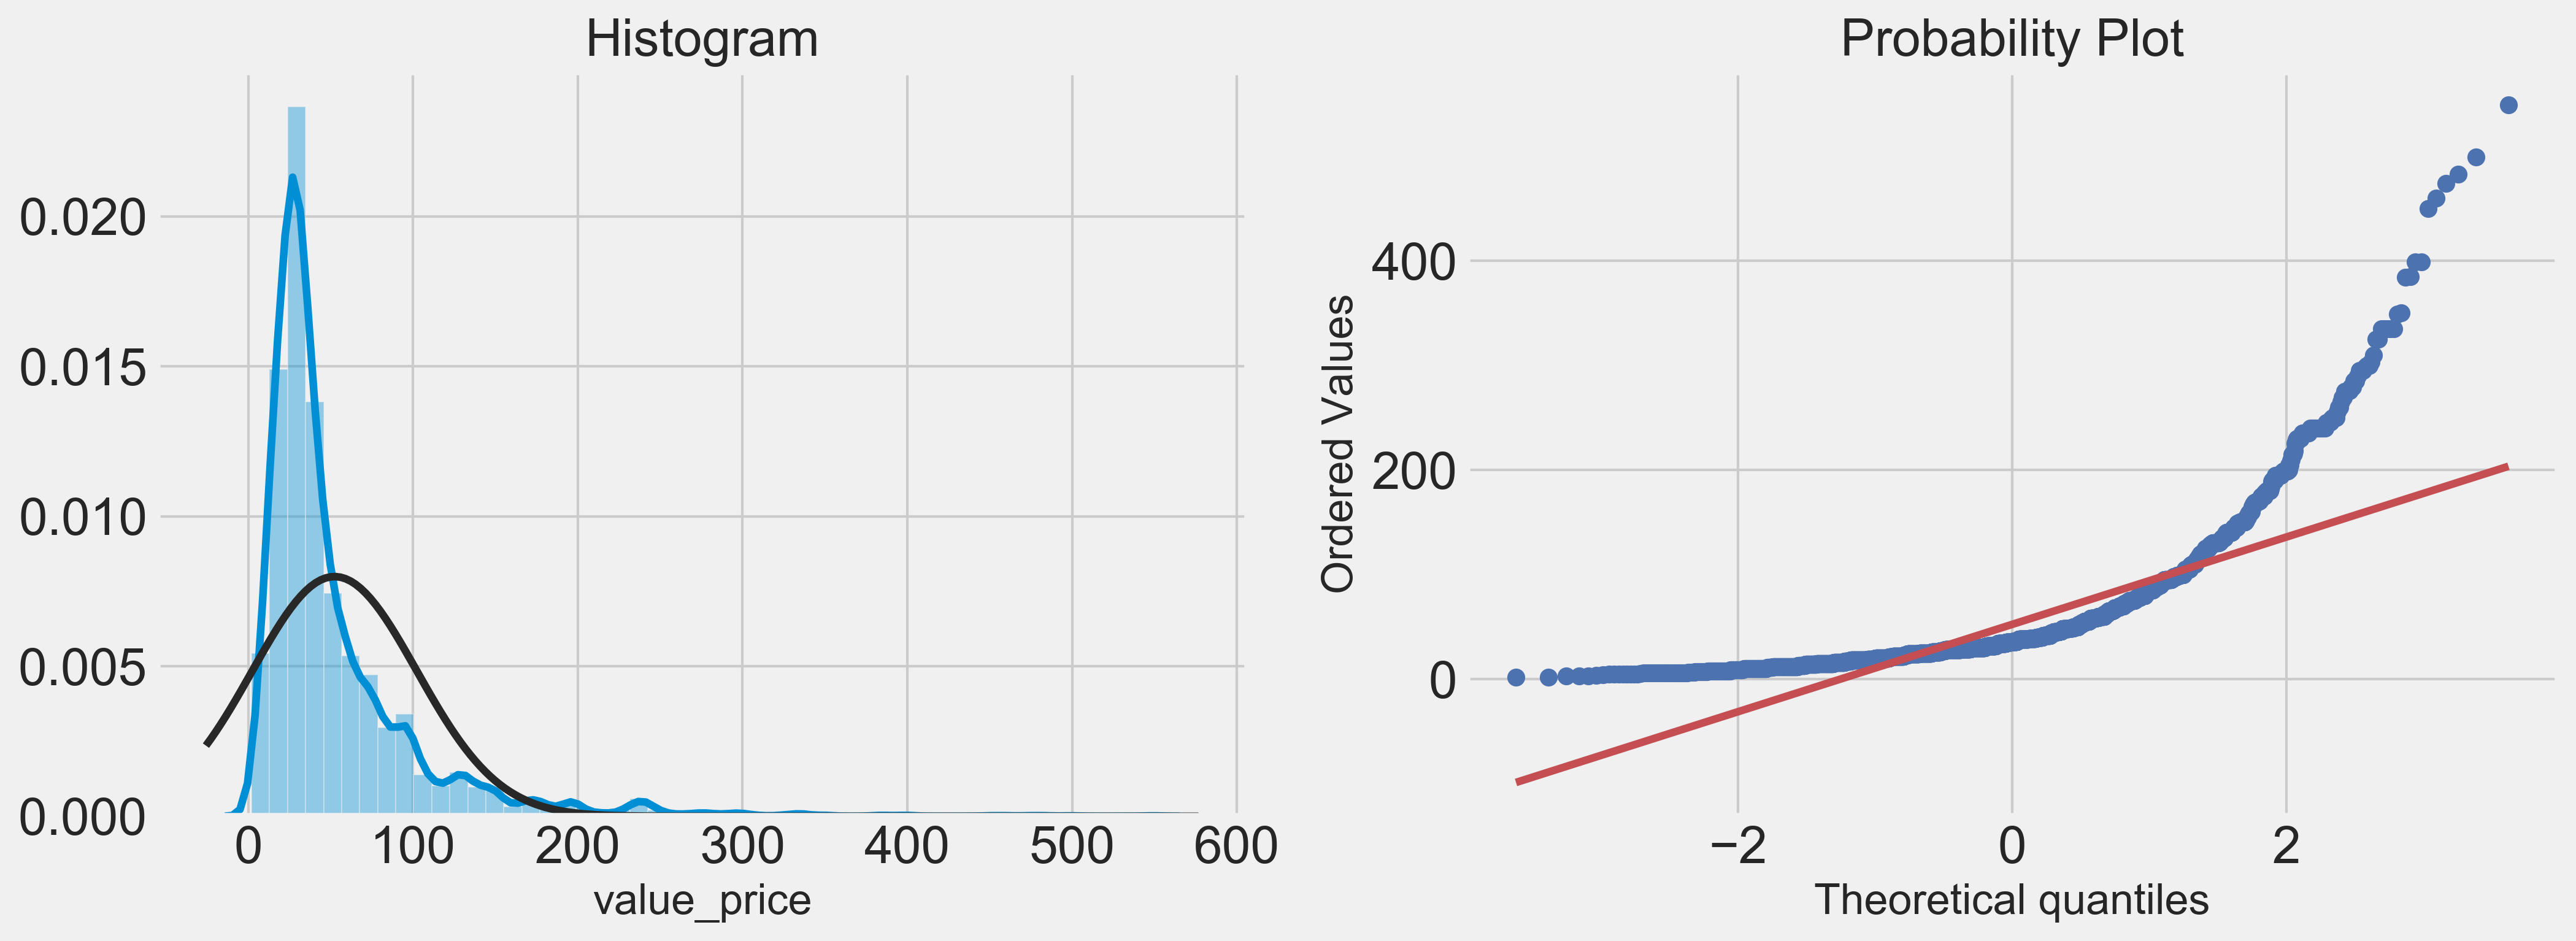

In [56]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(data_2019.value_price.skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(data_2019['value_price'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(data_2019['value_price'], plot=ax2)

plt.show()

## Checking the "avg_rev" distribution¶

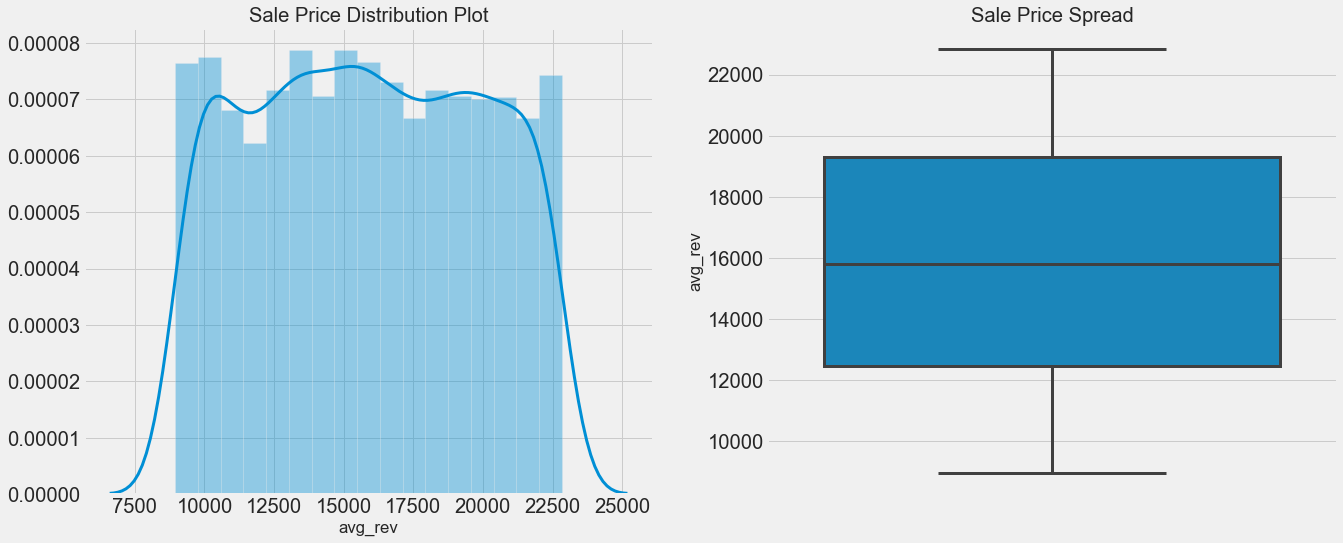

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(data_2019.avg_rev)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=data_2019.avg_rev)

plt.show()

In [31]:
print(df.avg_rev_month.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     9168.000000
mean     15823.559664
std       3991.043511
min       8946.000000
25%      12412.000000
50%      15787.000000
75%      19224.750000
85%      20654.900000
90%      21375.300000
100%     22837.000000
max      22837.000000
Name: avg_rev_month, dtype: float64


Skewness Co-efficient: 0.013


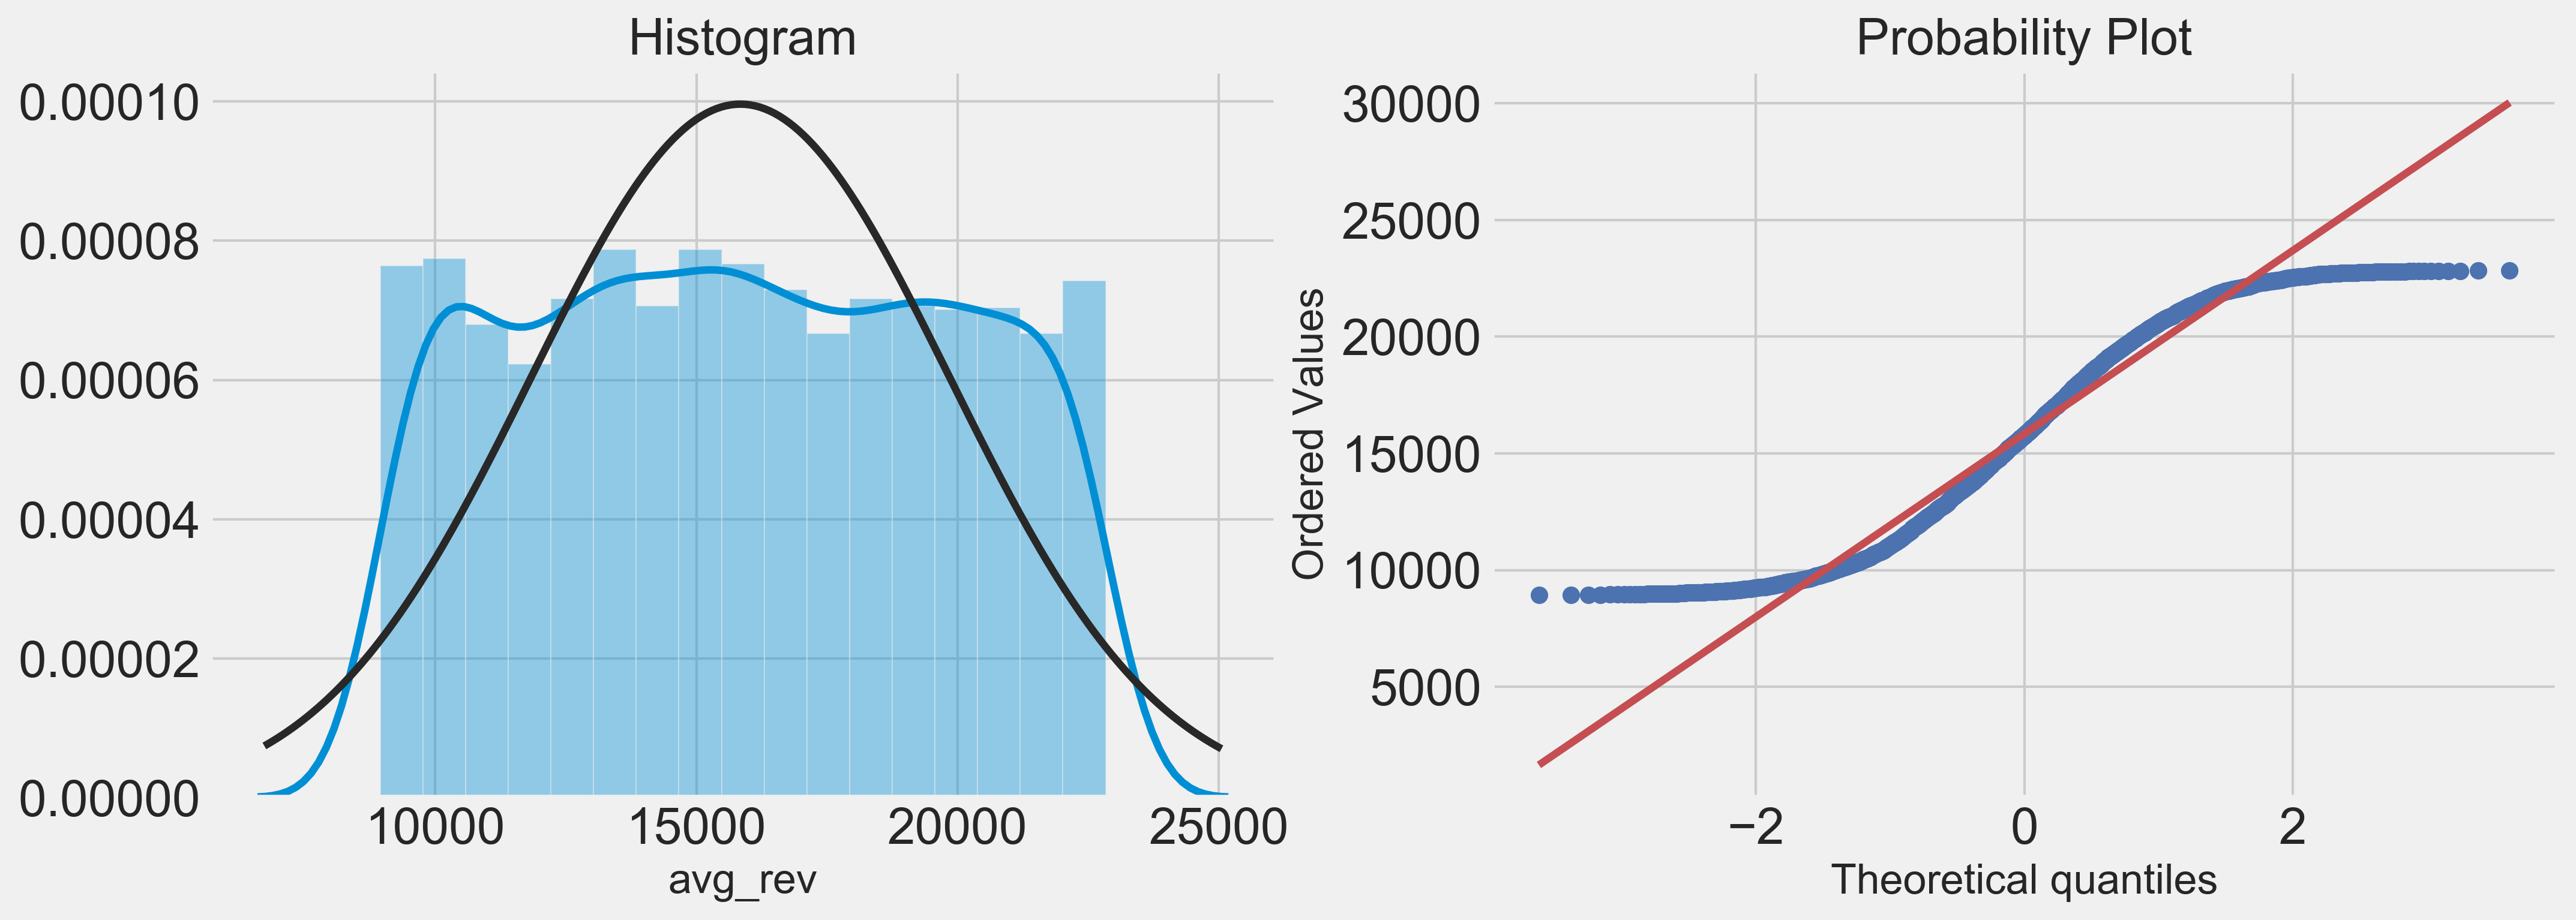

In [57]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(data_2019.avg_rev.skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(data_2019['avg_rev'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(data_2019['avg_rev'], plot=ax2)

plt.show()

From the histogram and we can observe that the avg_rev is positive skewed but the value is 0.013 which very good.

Tha data distribution is normal(Gaussian), As (linear) models love normally distributed data.

So we no transformation is required.

### Price and Value_price 

In [32]:
for index, row in data.iterrows():
    if row['price']!=row['value_price']:
        print(index, row['price'], row['value_price'])

0 66.0 75.0
4 72.0 80.0
15 80.0 95.0
20 113.0 143.0
28 200.0 279.0
31 113.0 143.0
32 200.0 279.0
65 125.0 200.0
77 80.0 144.0
82 40.0 60.0
88 112.0 137.0
110 95.0 129.0
135 65.0 97.0
166 25.0 36.0
182 29.0 44.0
200 29.0 52.0
207 150.0 165.0
253 62.0 81.0
254 170.0 230.0
259 25.0 28.0
265 140.0 197.0
318 24.0 32.0
344 30.0 37.0
363 49.0 72.0
369 88.0 112.0
384 126.0 198.0
412 118.0 170.0
422 130.0 170.0
425 95.0 137.0
427 95.0 137.0
441 170.0 216.0
444 370.0 483.0
450 110.0 144.0
466 55.0 85.0
472 24.0 37.0
478 135.0 160.0
481 135.0 160.0
483 78.0 126.0
494 140.0 190.0
503 80.0 110.0
504 135.0 160.0
586 199.0 234.0
587 199.0 260.0
590 249.0 269.0
603 30.0 78.0
612 45.0 65.0
626 50.0 60.0
627 20.0 28.0
628 35.0 50.0
654 25.0 44.0
658 25.0 34.0
678 25.0 30.0
682 23.0 31.0
690 38.0 57.0
717 36.0 60.0
726 25.0 38.0
734 44.0 60.0
735 24.0 38.0
742 24.0 36.0
745 32.0 45.0
748 32.0 48.0
752 34.0 65.0
754 30.0 51.0
757 22.0 34.0
761 32.0 48.0
772 32.0 45.0
774 24.0 36.0
775 32.0 47.0
783 34.0 5

From the correaltion heatmap the price and value_price are highly correlated so checked for similarities,

from the abou´ve both have different values so we keep two columns.


### What Brand Got the Highest Number of Reviews

In [60]:
best_brand_Reviews = data_2019.groupby(["brand"]).head()
best_brand_Reviews = best_brand_Reviews.sort_values('number_of_reviews', ascending=False)
best_brand_Reviews.head()

id                    brand    category  \
519   1922541             bareMinerals  Foundation   
710   1343938        Benefit Cosmetics     Mascara   
2821  2164671  FENTY BEAUTY by Rihanna  Foundation   
8463  1393693              Urban Decay    Eyeliner   
1160   980995                    Buxom   Lip Gloss   

                                                   name              size  \
519   Original Loose Powder Mineral Foundation Broad...           0.28 oz   
710      They’re Real! Lengthening & Volumizing Mascara     0.3 oz/ 8.5 g   
2821          Pro Filt'r Soft Matte Longwear Foundation    1.08 oz/ 32 mL   
8463                           24/7 Glide-On Eye Pencil    0.04 oz/ 1.2 g   
1160                 Full-On™ Plumping Lip Polish Gloss  0.15 oz/ 4.44 mL   

      rating  number_of_reviews    love  price  value_price  ...  \
519      4.5              19000  191700   32.0         32.0  ...   
710      4.0              15000  287300   25.0         25.0  ...   
2821     4.0              15000  625500   35.0         35.0  ...   
8463     4.5              15000  397600   22.0         22.0  ...   
1160     4.5              12000  393200   21.0         21.0  ...   

                                             how_to_use  \
519   Suggested Usage:\n-Use the Beautiful Finish Br...   
710   Suggested Usage:\n-Position wand horizontally ...   
2821  Suggested Usage:-Be sure to moisturize skin be...   
8463  Suggested Usage:-Draw precise lines or smudge ...   
1160  Suggested Usage:-Wear each shade alone or over...   

                                            ingredients online_only exclusive  \
519    -Titanium Dioxide and Zinc Oxide: Mineral sun...           0         0   
710   Water- Paraffin- Polybutene- Styrene/Acrylates...           0         0   
2821  Water- Dimethicone- Talc- Peg-10 Dimethicone- ...           0         1   
8463  Isododecane- Cyclopentasiloxane- PEG/PPG-19/19...           0         0   
1160  All original shades except Dominique and Kryst...           0         0   

     limited_edition limited_time_offer month  year  avg_rev  items_sold  
519                0                  0     1  2019    20063         900  
710                0                  0     3  2019    15331         702  
2821               0                  0    11  2019    12419        1996  
8463               0                  0     3  2019    17022         886  
1160               0                  0     9  2019    22431        1229  

[5 rows x 25 columns]

### What Brand Got the Highest revenue 2019

In [62]:
best_Brand_month_rev = data_2019.groupby(["brand"]).head()
best_Brand_month_rev = best_Brand_month_rev.sort_values('avg_rev', ascending=False)
best_Brand_month_rev.head()

id               brand           category  \
8542  1927714       Velour Lashes    False Eyelashes   
1475  2276178    Christophe Robin  Value & Gift Sets   
3306  2319085                goop       Facial Peels   
1307  1237379              CHANEL            Perfume   
5323  1501311  Marc Jacobs Beauty           Eyeliner   

                                                name            size  rating  \
8542                                   Lash Adhesive   0.5 oz/ 10 mL     4.0   
1475                                Perfect Hair Duo         no size     4.0   
3306  GOOPGLOW 15% Glycolic Acid Overnight Glow Peel         no size     4.5   
1307               CHANCE EAU TENDRE Eau de Toilette          1.7 oz     5.0   
5323               Highliner Gel Eye Crayon Eyeliner  0.01 oz/ 0.5 g     4.5   

      number_of_reviews    love  price  value_price  ...  \
8542                355   11700   12.0         12.0  ...   
1475                 16    5100   23.0         23.0  ...   
3306                351    1100  125.0        125.0  ...   
1307                447   68800   85.0         85.0  ...   
5323               7000  263200   26.0         26.0  ...   

                                             how_to_use  \
8542  Suggested Usage:\n How to Apply: \n\n-1. Prep ...   
1475  Suggested Usage:-Use the Cleansing Purifying S...   
3306  Suggested Usage:-Before bed- wash and dry skin...   
1307  Suggested Usage:-Fragrance is intensified by t...   
5323  Suggested Usage:\n-Uncap and glide Highliner a...   

                                            ingredients online_only exclusive  \
8542  Acrylates/Ethylhexl- Acrylate Copolymer- Water...           0         1   
1475   -Sea Salt: Helps purify by removing residue.-...           0         0   
3306    -Glycolic Acid (AHA) 15%: The gold standard ...           0         0   
1307                                            unknown           0         0   
5323   -Vitamin E and Rosa Canina Seed Extract: Soot...           0         0   

     limited_edition limited_time_offer month  year  avg_rev  items_sold  
8542               0                  0     9  2019    22813         391  
1475               1                  0    10  2019    22808         298  
3306               0                  0     3  2019    22803         784  
1307               0                  0     5  2019    22798        1316  
5323               0                  0     7  2019    22798        2097  

[5 rows x 25 columns]

### What Brand Got the Highest revenue 2020

In [63]:
best_Brand_month_rev = data_2020.groupby(["brand"]).head()
best_Brand_month_rev = best_Brand_month_rev.sort_values('avg_rev', ascending=False)
best_Brand_month_rev.head()

id                   brand                   category  \
8426  1957364              Tory Burch                    Perfume   
1912  1794379  Comptoir Sud Pacifique  Rollerballs & Travel Size   
4951  2120269                LASHFOOD            Makeup Removers   
7458  1708643              shu uemura    Scalp & Hair Treatments   
1463  2157147     Christian Louboutin                  Eyeshadow   

                                                   name              size  \
8426                                Tory Burch Bel Azur    3.4 oz/ 100 mL   
1912                       Vanille Extreme Travel Spray  0.35 oz/ 10.4 mL   
4951                        Chamomile Makeup Eraser Pen     0.03 oz/ 1 mL   
7458  Silk Bloom Restorative Treatment- For Damaged ...      6 oz/ 177 mL   
1463                 Tape A l'Oeil- Metallic Eye Colour     0.23 oz/ 7 mL   

      rating  number_of_reviews  love  price  value_price  ...  \
8426     4.0                147  6500  130.0        130.0  ...   
1912     4.0                 29  3300   26.0         26.0  ...   
4951     4.0                 29  5100   18.0         18.0  ...   
7458     4.5                 18  1800   69.0         69.0  ...   
1463     3.5                  8  2100   50.0         50.0  ...   

                                             how_to_use  \
8426                                    no instructions   
1912                                    no instructions   
4951  Suggested Usage:-The precise tip allows you to...   
7458  Suggested Usage:\n-Apply to clean- damp hair. ...   
1463  Suggested Usage:-Metallic Eye Colour can be us...   

                                            ingredients online_only exclusive  \
8426                                            unknown           0         0   
1912                  Alcohol Denat.- Fragrance- Water.           0         0   
4951  Water- Polyglyceryl-4 Laurate/Sebacate- Polygl...           1         0   
7458   -Argan Oil: Produces precious oil recognized ...           0         0   
1463  Water- Mica- Aluminum Calcium Sodium Silicate-...           1         0   

     limited_edition limited_time_offer month  year  avg_rev  items_sold  
8426               0                  0    11  2020    22831        1384  
1912               0                  0     3  2020    22817         192  
4951               0                  0     4  2020    22813         596  
7458               0                  0     2  2020    22812        1535  
1463               0                  0     2  2020    22802        1932  

[5 rows x 25 columns]

### What Most Popular Product Based on Rating in 2019

In [64]:
product_rating = pd.DataFrame(round(data_2019.groupby('brand')['rating'].mean(),2))
high_rating = product_rating.sort_values('rating', ascending=False)
high_rating.head()

rating
brand                
Four Sigmatic     5.0
Fable & Mane      5.0
Aether Beauty     5.0
Montblanc         5.0
YUNI              5.0

### What Most Popular Product Based on Rating in 2020

In [65]:
product_rating = pd.DataFrame(round(data_2020.groupby('brand')['rating'].mean(),2))
high_rating = product_rating.sort_values('rating', ascending=False)
high_rating.head()

rating
brand                
Fable & Mane      5.0
Donna Karan       5.0
Four Sigmatic     5.0
Aether Beauty     5.0
Montblanc         5.0

### What Most Popular Product Based on avgerage revenue for 2019

In [71]:
product_rating = pd.DataFrame(round(data_2019.groupby('brand')["avg_rev"].mean(),2))
high_rating = product_rating.sort_values('avg_rev', ascending=False)
high_rating.head()

avg_rev
brand                     
WelleCo            22522.5
Makeup Eraser      22277.0
Saint Jane Beauty  21393.0
PLAY! by SEPHORA   20869.0
Buxom              20666.8

### What Most Popular Product Based on avgerage revenue for 2020

In [72]:
product_rating = pd.DataFrame(round(data_2020.groupby('brand')["avg_rev"].mean(),2))
high_rating = product_rating.sort_values('avg_rev', ascending=False)
high_rating.head()

avg_rev
brand                   
bkr              22127.0
Conture          21999.0
Donna Karan      21486.0
Coal and Canary  21302.0
Black Up         21271.0

### What Product got the most total Rating 2019

In [75]:
popular_products = pd.DataFrame(data_2019.groupby('brand')['rating'].sum())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head()

rating
brand                     
SEPHORA COLLECTION   957.0
CLINIQUE             442.0
tarte                367.5
TOM FORD             304.5
Kiehl's Since 1851   299.0

### What Product got the most total Rating 2019

In [76]:
popular_products = pd.DataFrame(data_2020.groupby('brand')['rating'].sum())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head()

rating
brand                     
SEPHORA COLLECTION   953.5
CLINIQUE             477.0
TOM FORD             332.0
Fresh                320.5
tarte                313.5

The analysis obtained by SEPHORA COLLECTION brand 
managed to become the most popular product with a total number of ratings given by consumers, 
namely 1910.5 rating. but this could be because this brand has a lot of sales.
And aslo not much difference in 2019 or 2020.

### What Product got a lot of Love From Customer 2019

In [77]:
love_products = pd.DataFrame(data_2019.groupby('brand')['love'].mean())
most_love = love_products.sort_values('love', ascending=False)
most_love.head()

love
brand                                 
stila                    149033.333333
Buxom                    137240.000000
Anastasia Beverly Hills  102089.655172
Olaplex                   94650.000000
NARS                      86296.000000

### What Product got a lot of Love From Customer 2020

In [78]:
love_products = pd.DataFrame(data_2020.groupby('brand')['love'].mean())
most_love = love_products.sort_values('love', ascending=False)
most_love.head()

love
brand                          
stila             134875.000000
KVD Vegan Beauty   84608.571429
NARS               82415.625000
Makeup Eraser      79500.000000
HUDA BEAUTY        77412.500000

 Here clearly there's difference in brands based on love in years 2019 and 2020.
    

### What Product got a lot of Reviews From Customer in 2019

In [80]:
reviews_products = pd.DataFrame(data_2019.groupby('brand')['number_of_reviews'].mean())
most_reviews = reviews_products.sort_values('number_of_reviews', ascending=False)
most_reviews.head()

number_of_reviews
brand                                 
Buxom                      3096.000000
Rosebud Perfume Co.        3000.000000
bareMinerals               1373.484848
NARS                       1213.160000
BECCA                      1103.863636

### What Product got a lot of Reviews From Customer in 2020

In [81]:
reviews_products = pd.DataFrame(data_2020.groupby('brand')['number_of_reviews'].mean())
most_reviews = reviews_products.sort_values('number_of_reviews', ascending=False)
most_reviews.head()

number_of_reviews
brand                              
Buxom                   9000.000000
stila                   3067.250000
Makeup Eraser           2000.000000
KVD Vegan Beauty        1670.485714
Too Faced               1365.442308

As for some brands that have the most love in the previous category can be seen also fall into the category of number_of_reviews the top 10. 

Clearly there's difference here from 2019 to 2020 years

### What Most Popular Category Based on Rating 2019

In [82]:
price_category = pd.DataFrame(data_2019.groupby('category')['rating'].mean())
most_price = price_category.sort_values('rating', ascending=False)
most_price.head()

rating
category                      
Eye Cream             4.833333
Cologne               4.582278
Mirrors & Sharpeners  4.500000
Lip Treatments        4.500000
High Tech Tools       4.500000

### What Most Popular Category Based on Rating 2020

In [83]:
price_category = pd.DataFrame(data_2020.groupby('category')['rating'].mean())
most_price = price_category.sort_values('rating', ascending=False)
most_price.head()

rating
category                          
Lid Shadow Brush          5.000000
Body Products             4.800000
Aftershave                4.700000
Shaving                   4.681818
Moisturizer & Treatments  4.625000

The most popular category are also different in both years so need to investiate into deeper.

### What Category With The Highest Income Value in 2019

In [87]:
price_sorted_category = pd.pivot_table(data_2019,
              index=['category'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['category', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

category     price
116                    Perfume  37893.50
113               Moisturizers  16116.95
56                 Face Serums  15249.02
137          Value & Gift Sets  10882.99
27                     Cologne   7862.00
43     Eye Creams & Treatments   7361.48
117          Perfume Gift Sets   6434.00
53                  Face Masks   5276.95
45                Eye Palettes   5070.00
119  Rollerballs & Travel Size   4558.00

### What Category With The Highest Income Value in 2020

In [88]:
price_sorted_category = pd.pivot_table(data_2020,
              index=['category'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['category', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

category     price
111                  Perfume  36690.50
56               Face Serums  16421.57
108             Moisturizers  14477.99
130        Value & Gift Sets  12507.00
26                   Cologne   7799.00
43   Eye Creams & Treatments   5979.49
45              Eye Palettes   5558.50
53                Face Masks   4897.97
60     Face Wash & Cleansers   4202.49
112        Perfume Gift Sets   3885.00

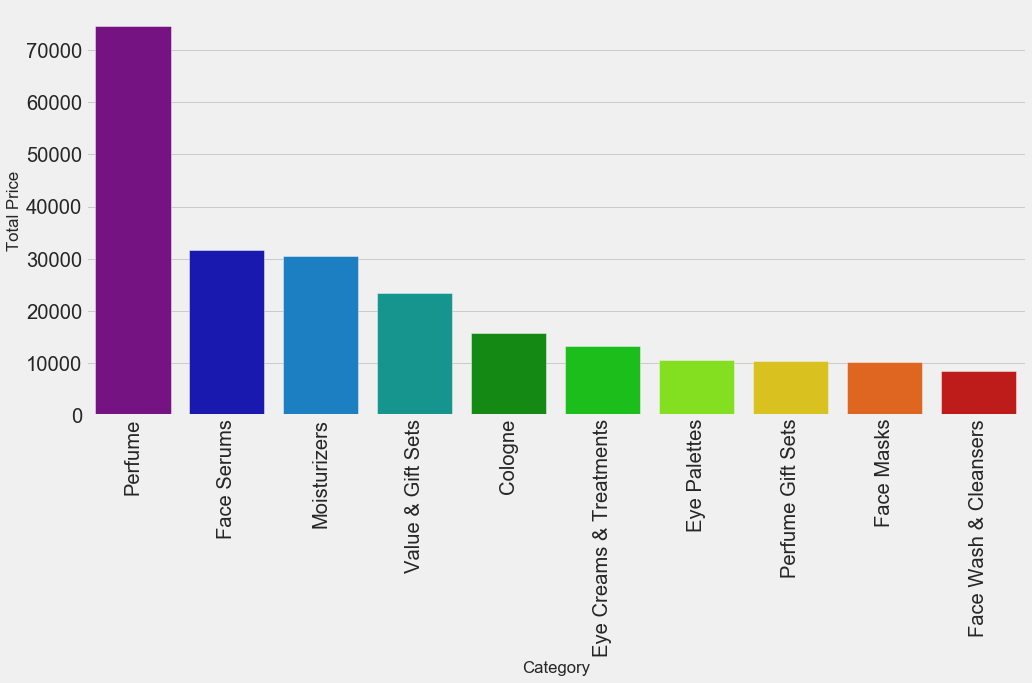

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category", y="price", data=price_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Price")

### What Brand With The Highest Income Value in 2019

In [89]:
price_sorted_category = pd.pivot_table(data_2019,
              index=['brand'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['brand', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

brand   price
247            TOM FORD  8867.0
62                 Dior  5106.0
219  SEPHORA COLLECTION  4979.0
115    Jo Malone London  4492.0
145              La Mer  3645.0
35             CLINIQUE  3463.0
65    Dr. Barbara Sturm  3345.0
93             Givenchy  3344.0
33               CHANEL  3286.0
90                Fresh  2973.0

### What Brand With The Highest Income Value in 2020

In [90]:
price_sorted_category = pd.pivot_table(data_2020,
              index=['brand'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['brand', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

brand    price
252            TOM FORD  9173.00
65                 Dior  4691.50
223  SEPHORA COLLECTION  4118.95
95                Fresh  3739.00
148              La Mer  3735.00
203        Perricone MD  3641.00
68    Dr. Barbara Sturm  3630.00
37             CLINIQUE  3579.50
237            Shiseido  3316.00
4        Acqua Di Parma  3200.00

### What Category With The Highest sales from Highest Income Value Brands 2019

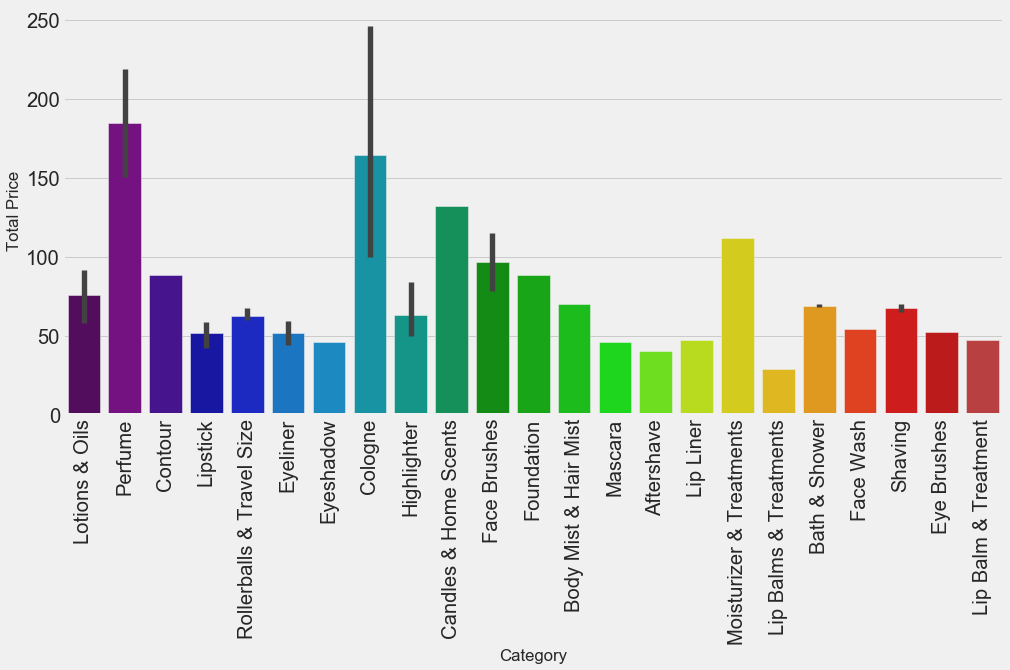

In [91]:
brandHighestPrice = data_2019[(data_2019["brand"] == 'TOM FORD')]


fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category", y="price", data=brandHighestPrice,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Price")

### What Category With The Highest sales from Highest Income Value Brands 2019

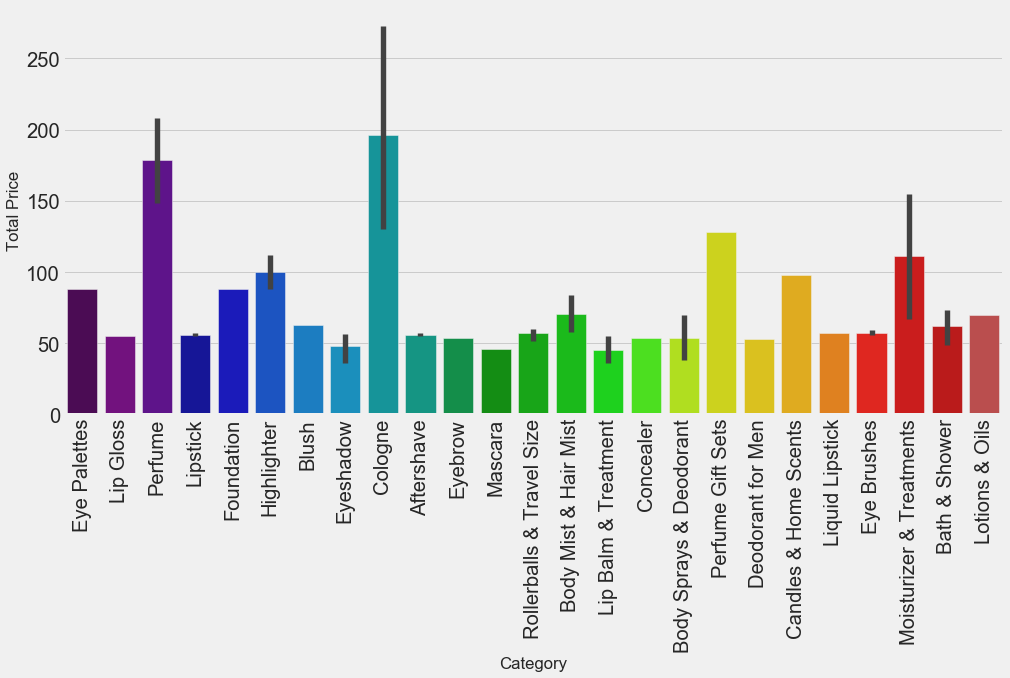

In [92]:
brandHighestPrice = data_2020[(data_2020["brand"] == 'TOM FORD')]


fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category", y="price", data=brandHighestPrice,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Price")

### What Product With The Highest Price 2019

In [94]:
price_sorted_category = pd.pivot_table(data_2019,
              index=['name'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['name', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

name  price
190                                     Airwrap™ Styler  549.0
1056                         Corrale™ Hair Straightener  499.0
1382                Elixir Vitae Serum Wrinkle Solution  450.0
4280  Trinity + Eye and Lip Enhancer Attachment Bundle   429.0
3989             Supersonic Hair Dryer 23.75 Karat Gold  399.0
3991  Supersonic™ Hair Dryer Gift Edition with Red Case  399.0
2883                          NuBODY Skin Toning Device  399.0
4327                             Ultimate Revival Cream  385.0
1376                         Elite Mirror Ten Brush Set  370.0
3956                             Super Anti-Aging Serum  350.0

### What Product With The Highest Price 2020

In [95]:
price_sorted_category = pd.pivot_table(data_2020,
              index=['name'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['name', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

name  price
2758            Neuropeptide Smoothing Facial Conformer  495.0
2918                       Orchidée Impériale The Cream  460.0
3734                          SpectraLite™ Faceware Pro  435.0
3735     SpectraLite™ Faceware Pro Wrinkle Reducing Duo  435.0
4121  Trinity Facial Toning Device + Wrinkle Reducer...  429.0
3873    Supersonic™ Hair Dryer Limited Edition Gift Set  399.0
3872                              Supersonic Hair Dryer  399.0
3956                                    The Concentrate  370.0
4029                             The Regenerating Serum  365.0
4147                             Tuscan Leather Intense  335.0

### What is the Brand With the Most Sales in 2019

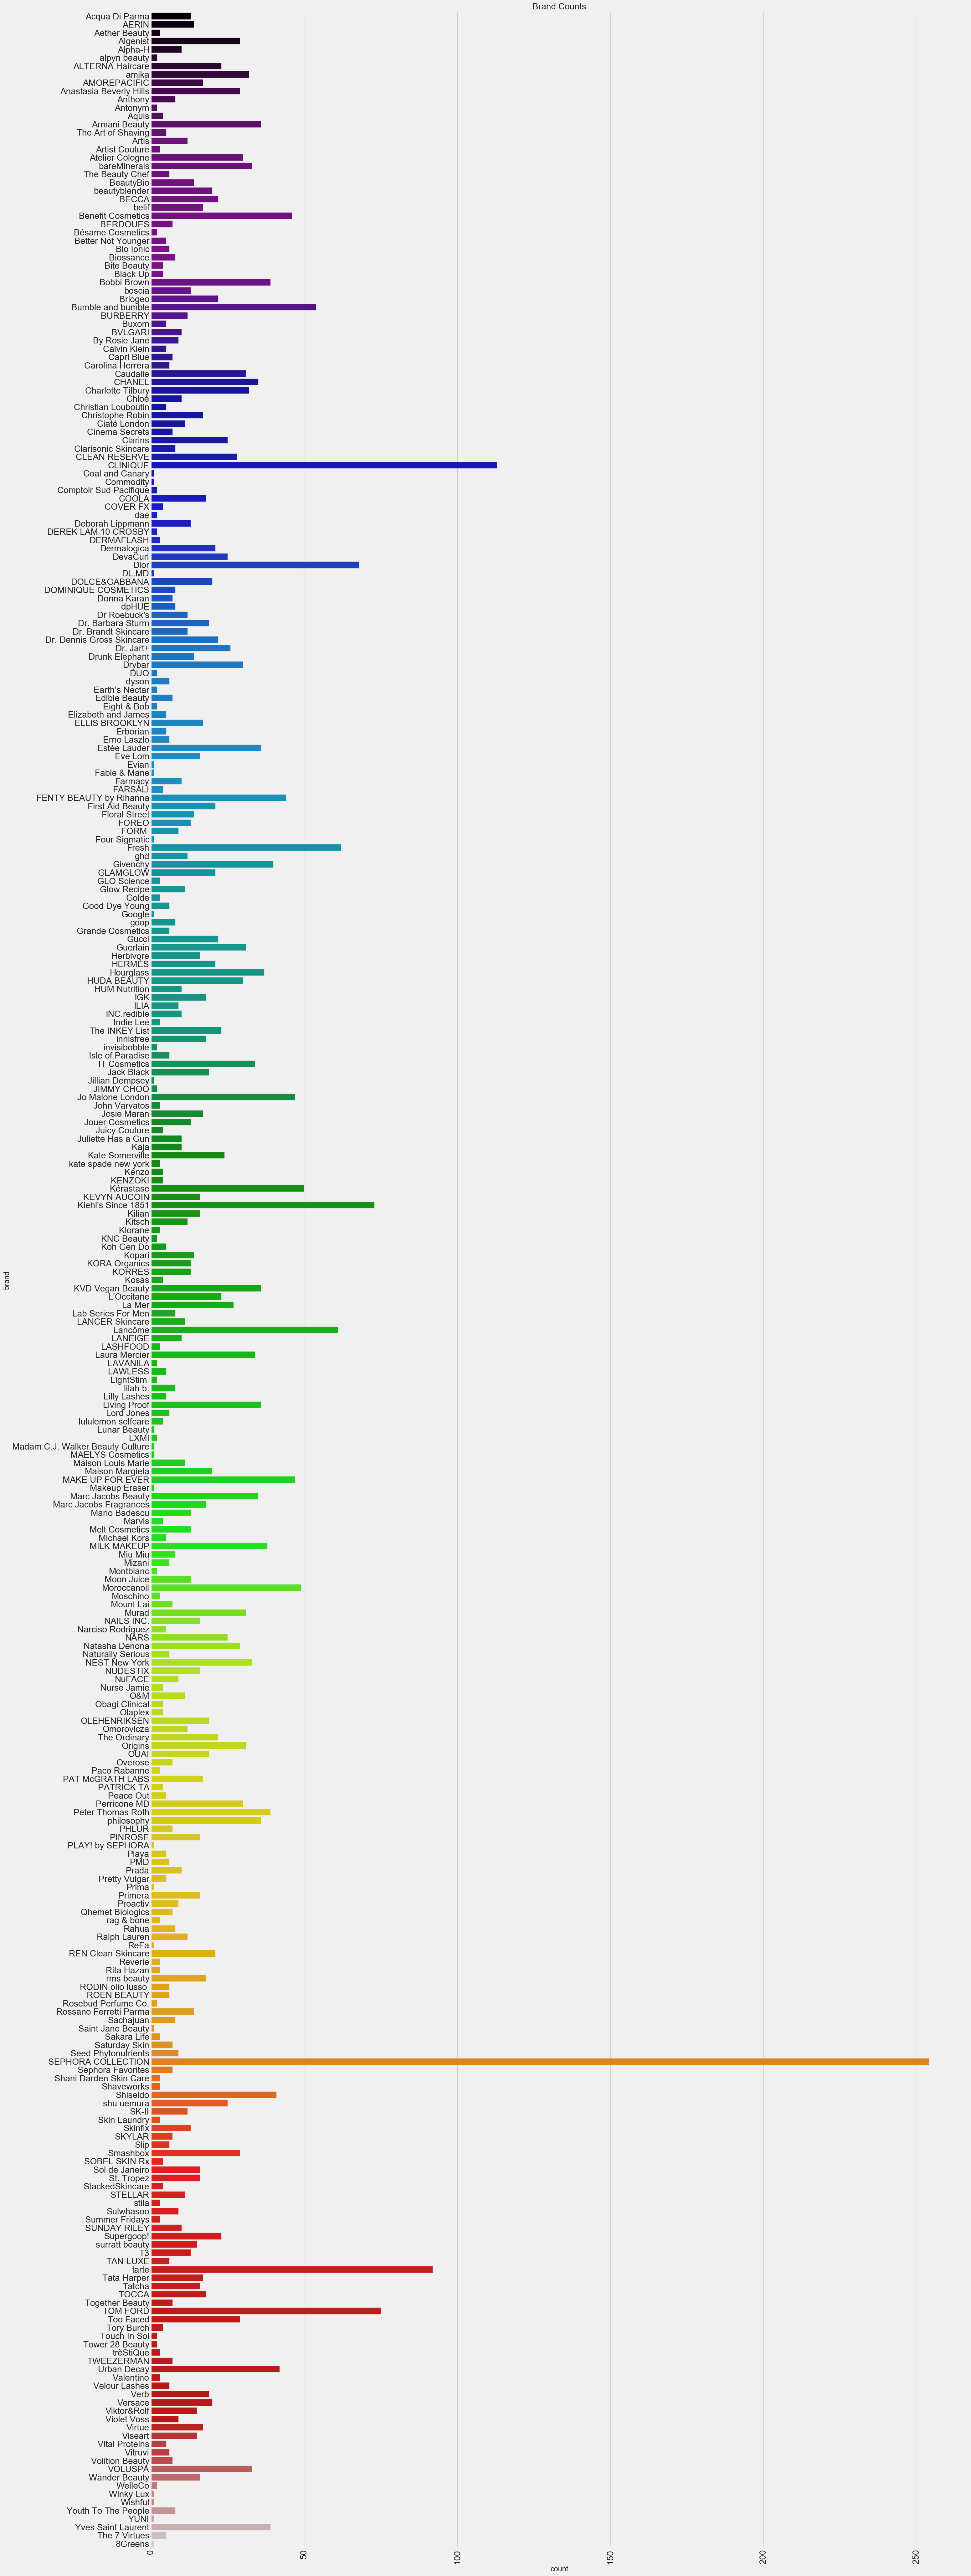

In [96]:
plt.figure(figsize=(30,100),dpi=100)
plt.xticks(rotation=90)
plt.title('Brand Counts')
sns.countplot(y=data_2019['brand'], palette="nipy_spectral");

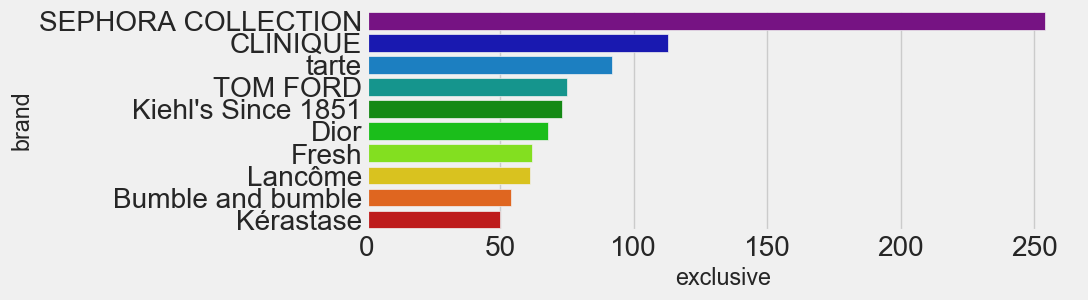

In [99]:
brandbig10 = data_2019.groupby(['brand'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=brandbig10['brand'],x=brandbig10['exclusive'], palette='nipy_spectral')

### What is the Brand With the Most Sales in 2020

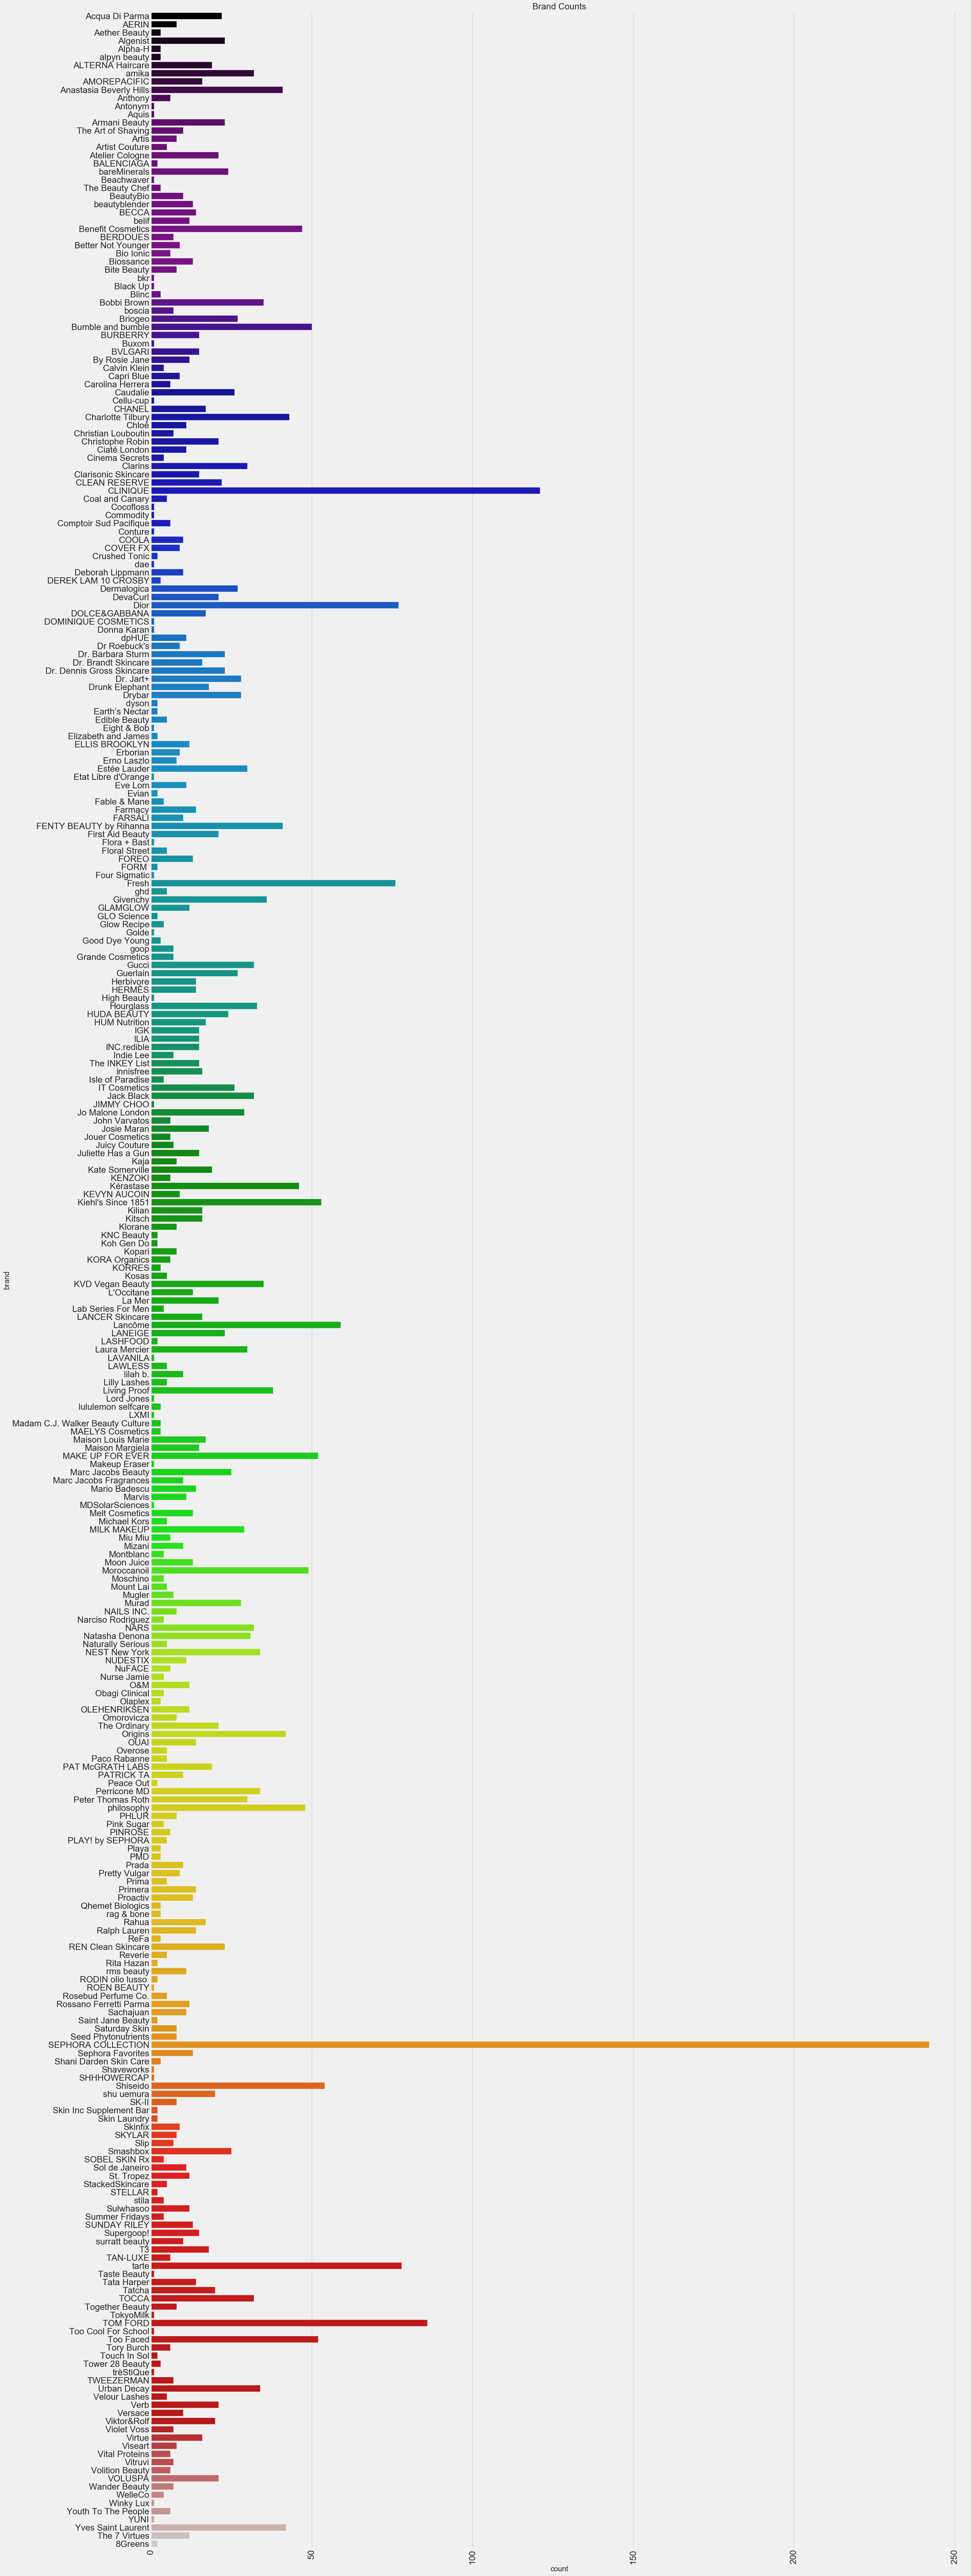

In [97]:
plt.figure(figsize=(30,100),dpi=100)
plt.xticks(rotation=90)
plt.title('Brand Counts')
sns.countplot(y=data_2020['brand'], palette="nipy_spectral");

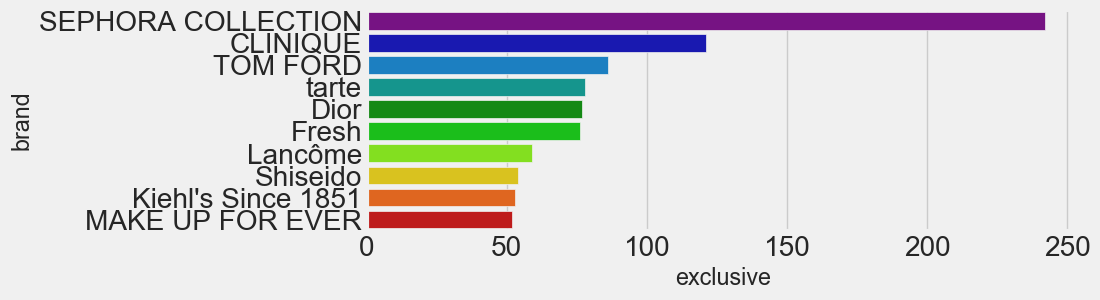

In [100]:
brandbig10 = data_2020.groupby(['brand'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=brandbig10['brand'],x=brandbig10['exclusive'], palette='nipy_spectral')

### What is the Category With the Most Sales in 2019

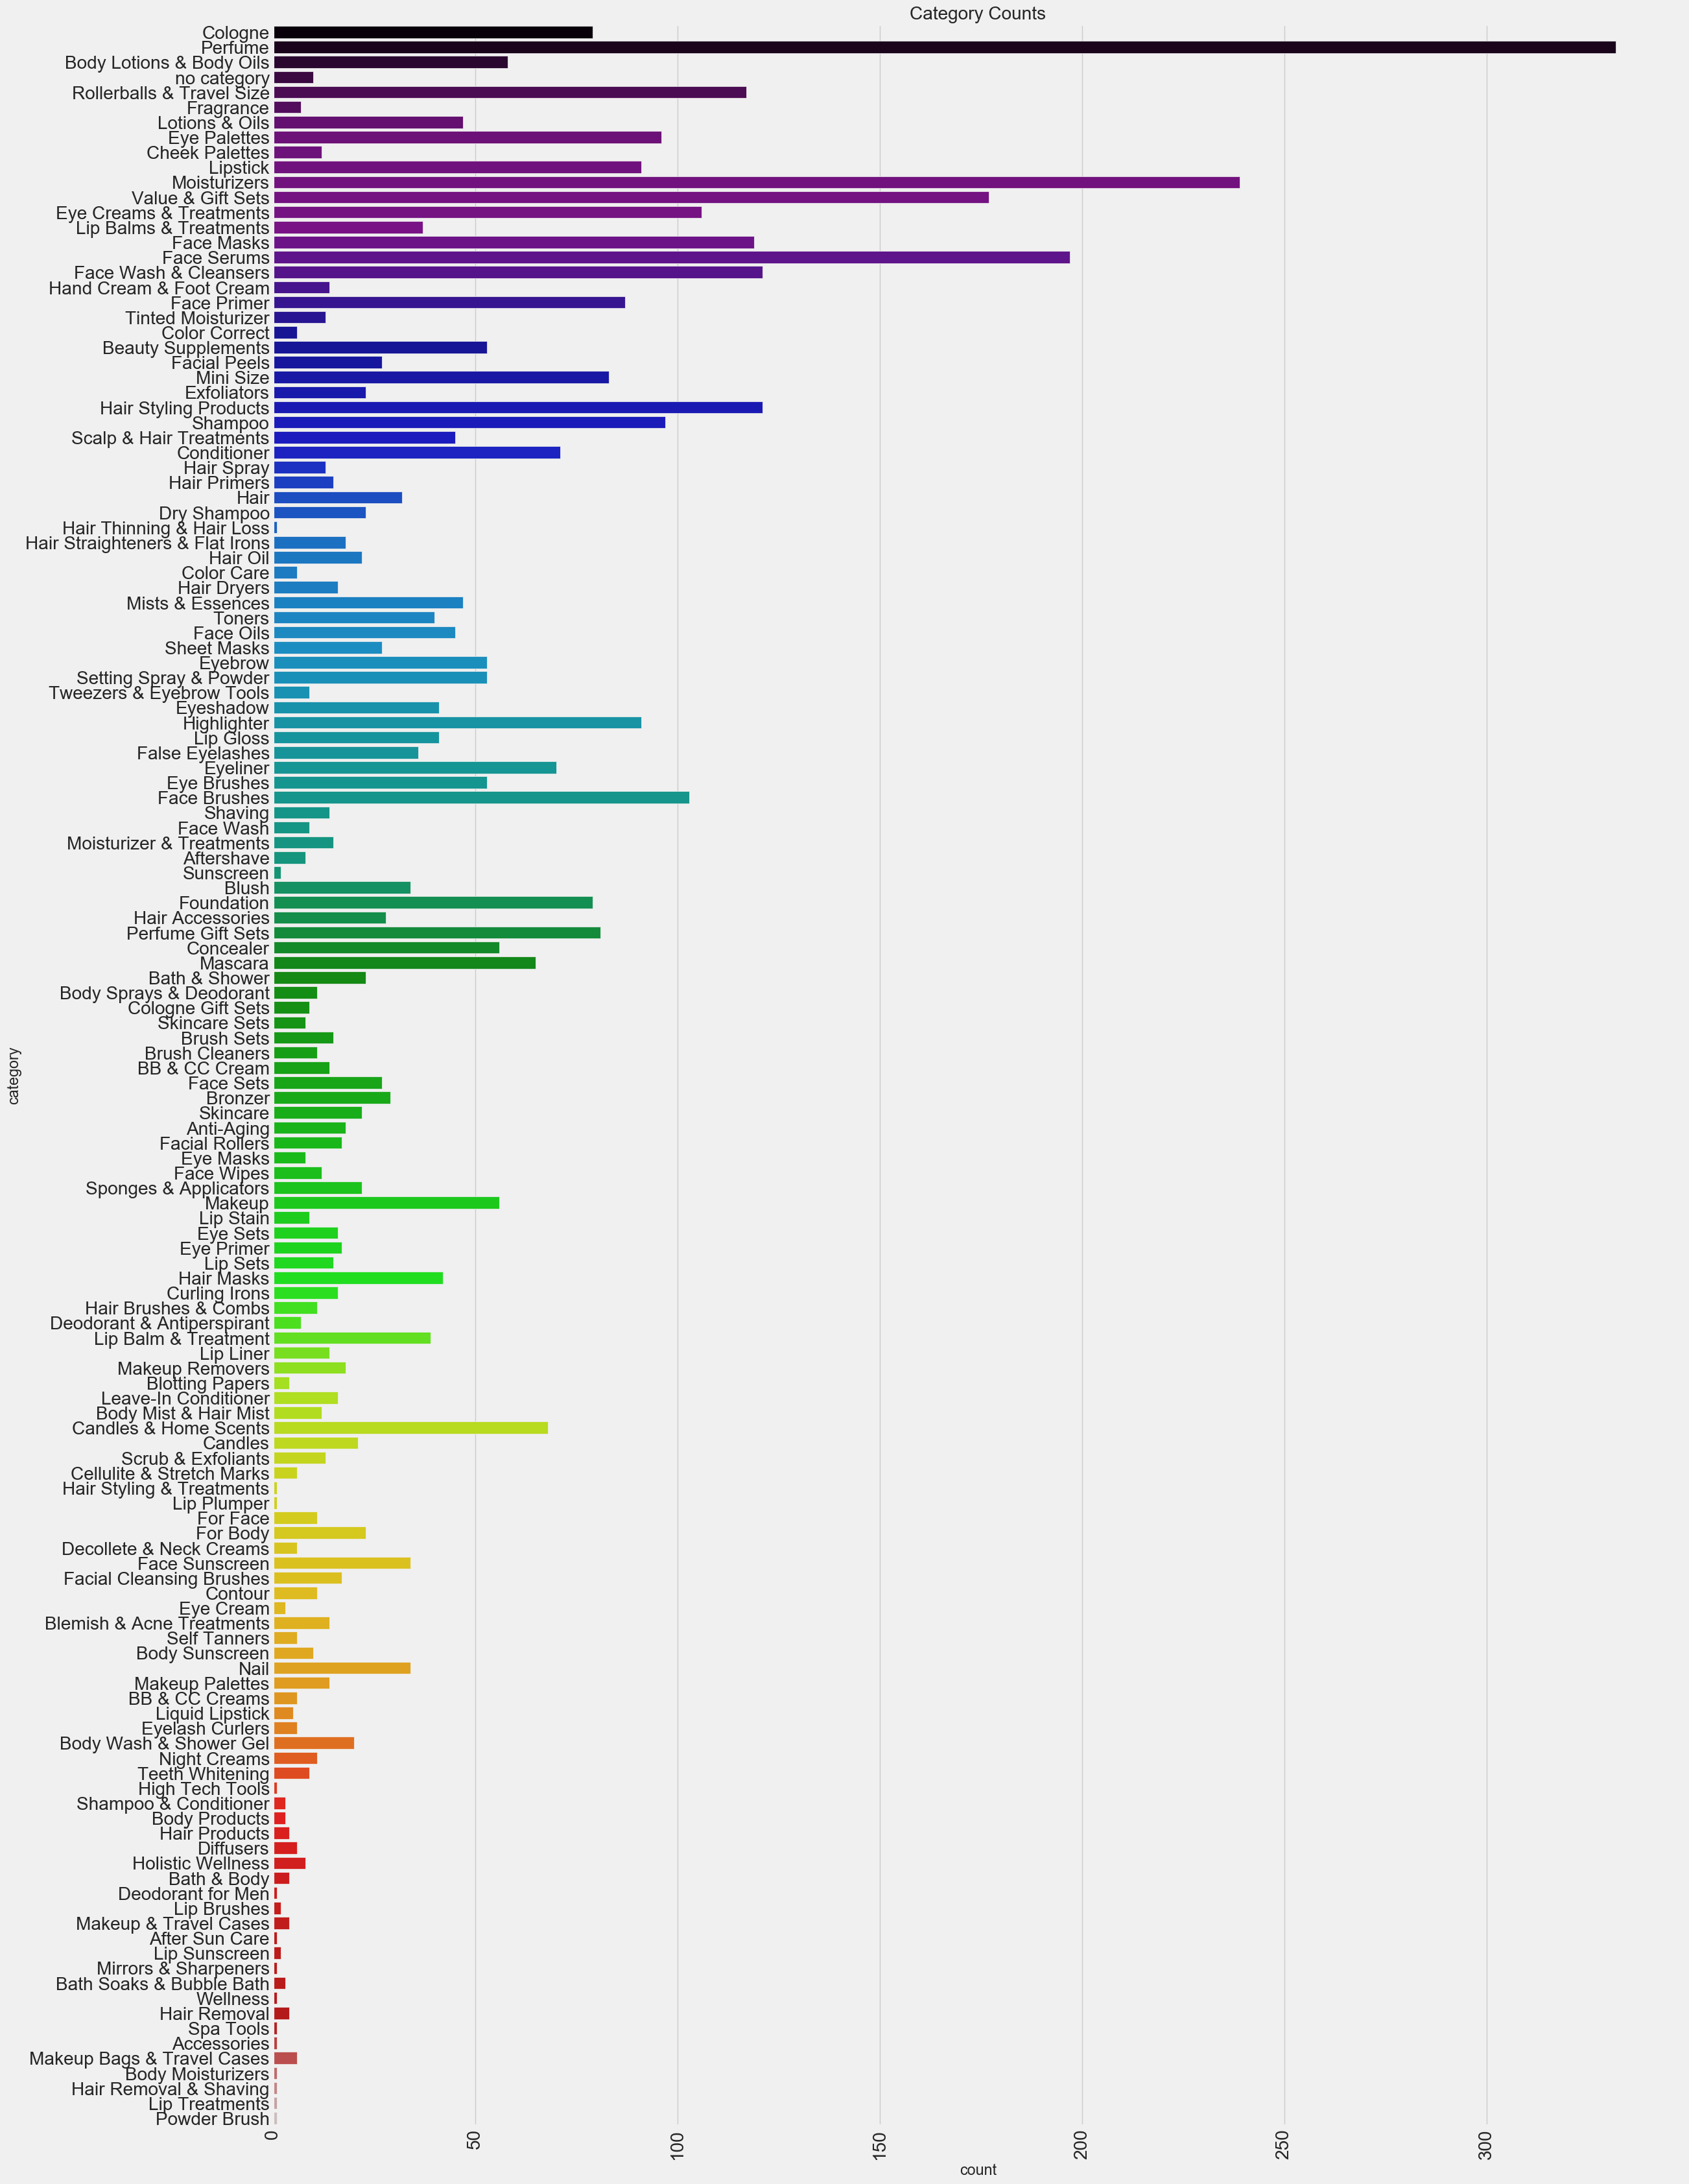

In [101]:
plt.figure(figsize=(25,40),dpi=100)
plt.xticks(rotation=90)
plt.title('Category Counts')
sns.countplot(y=data_2019['category'], palette="nipy_spectral");

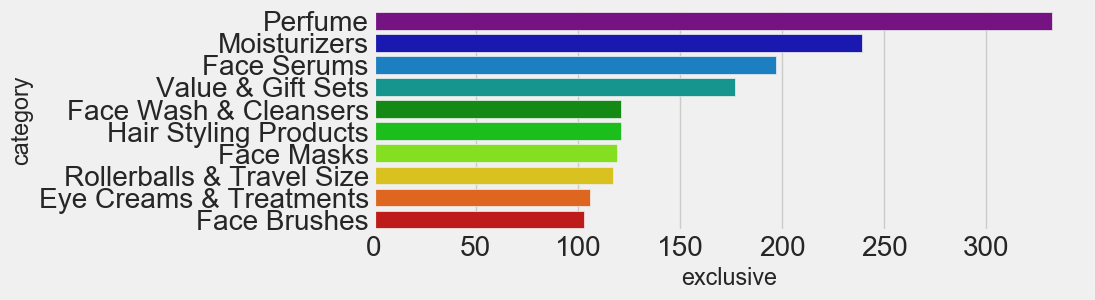

In [102]:
categorybig10 = data_2019.groupby(['category'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=categorybig10['category'],x=categorybig10['exclusive'], palette='nipy_spectral')

### What is the Category With the Most Sales in 2020

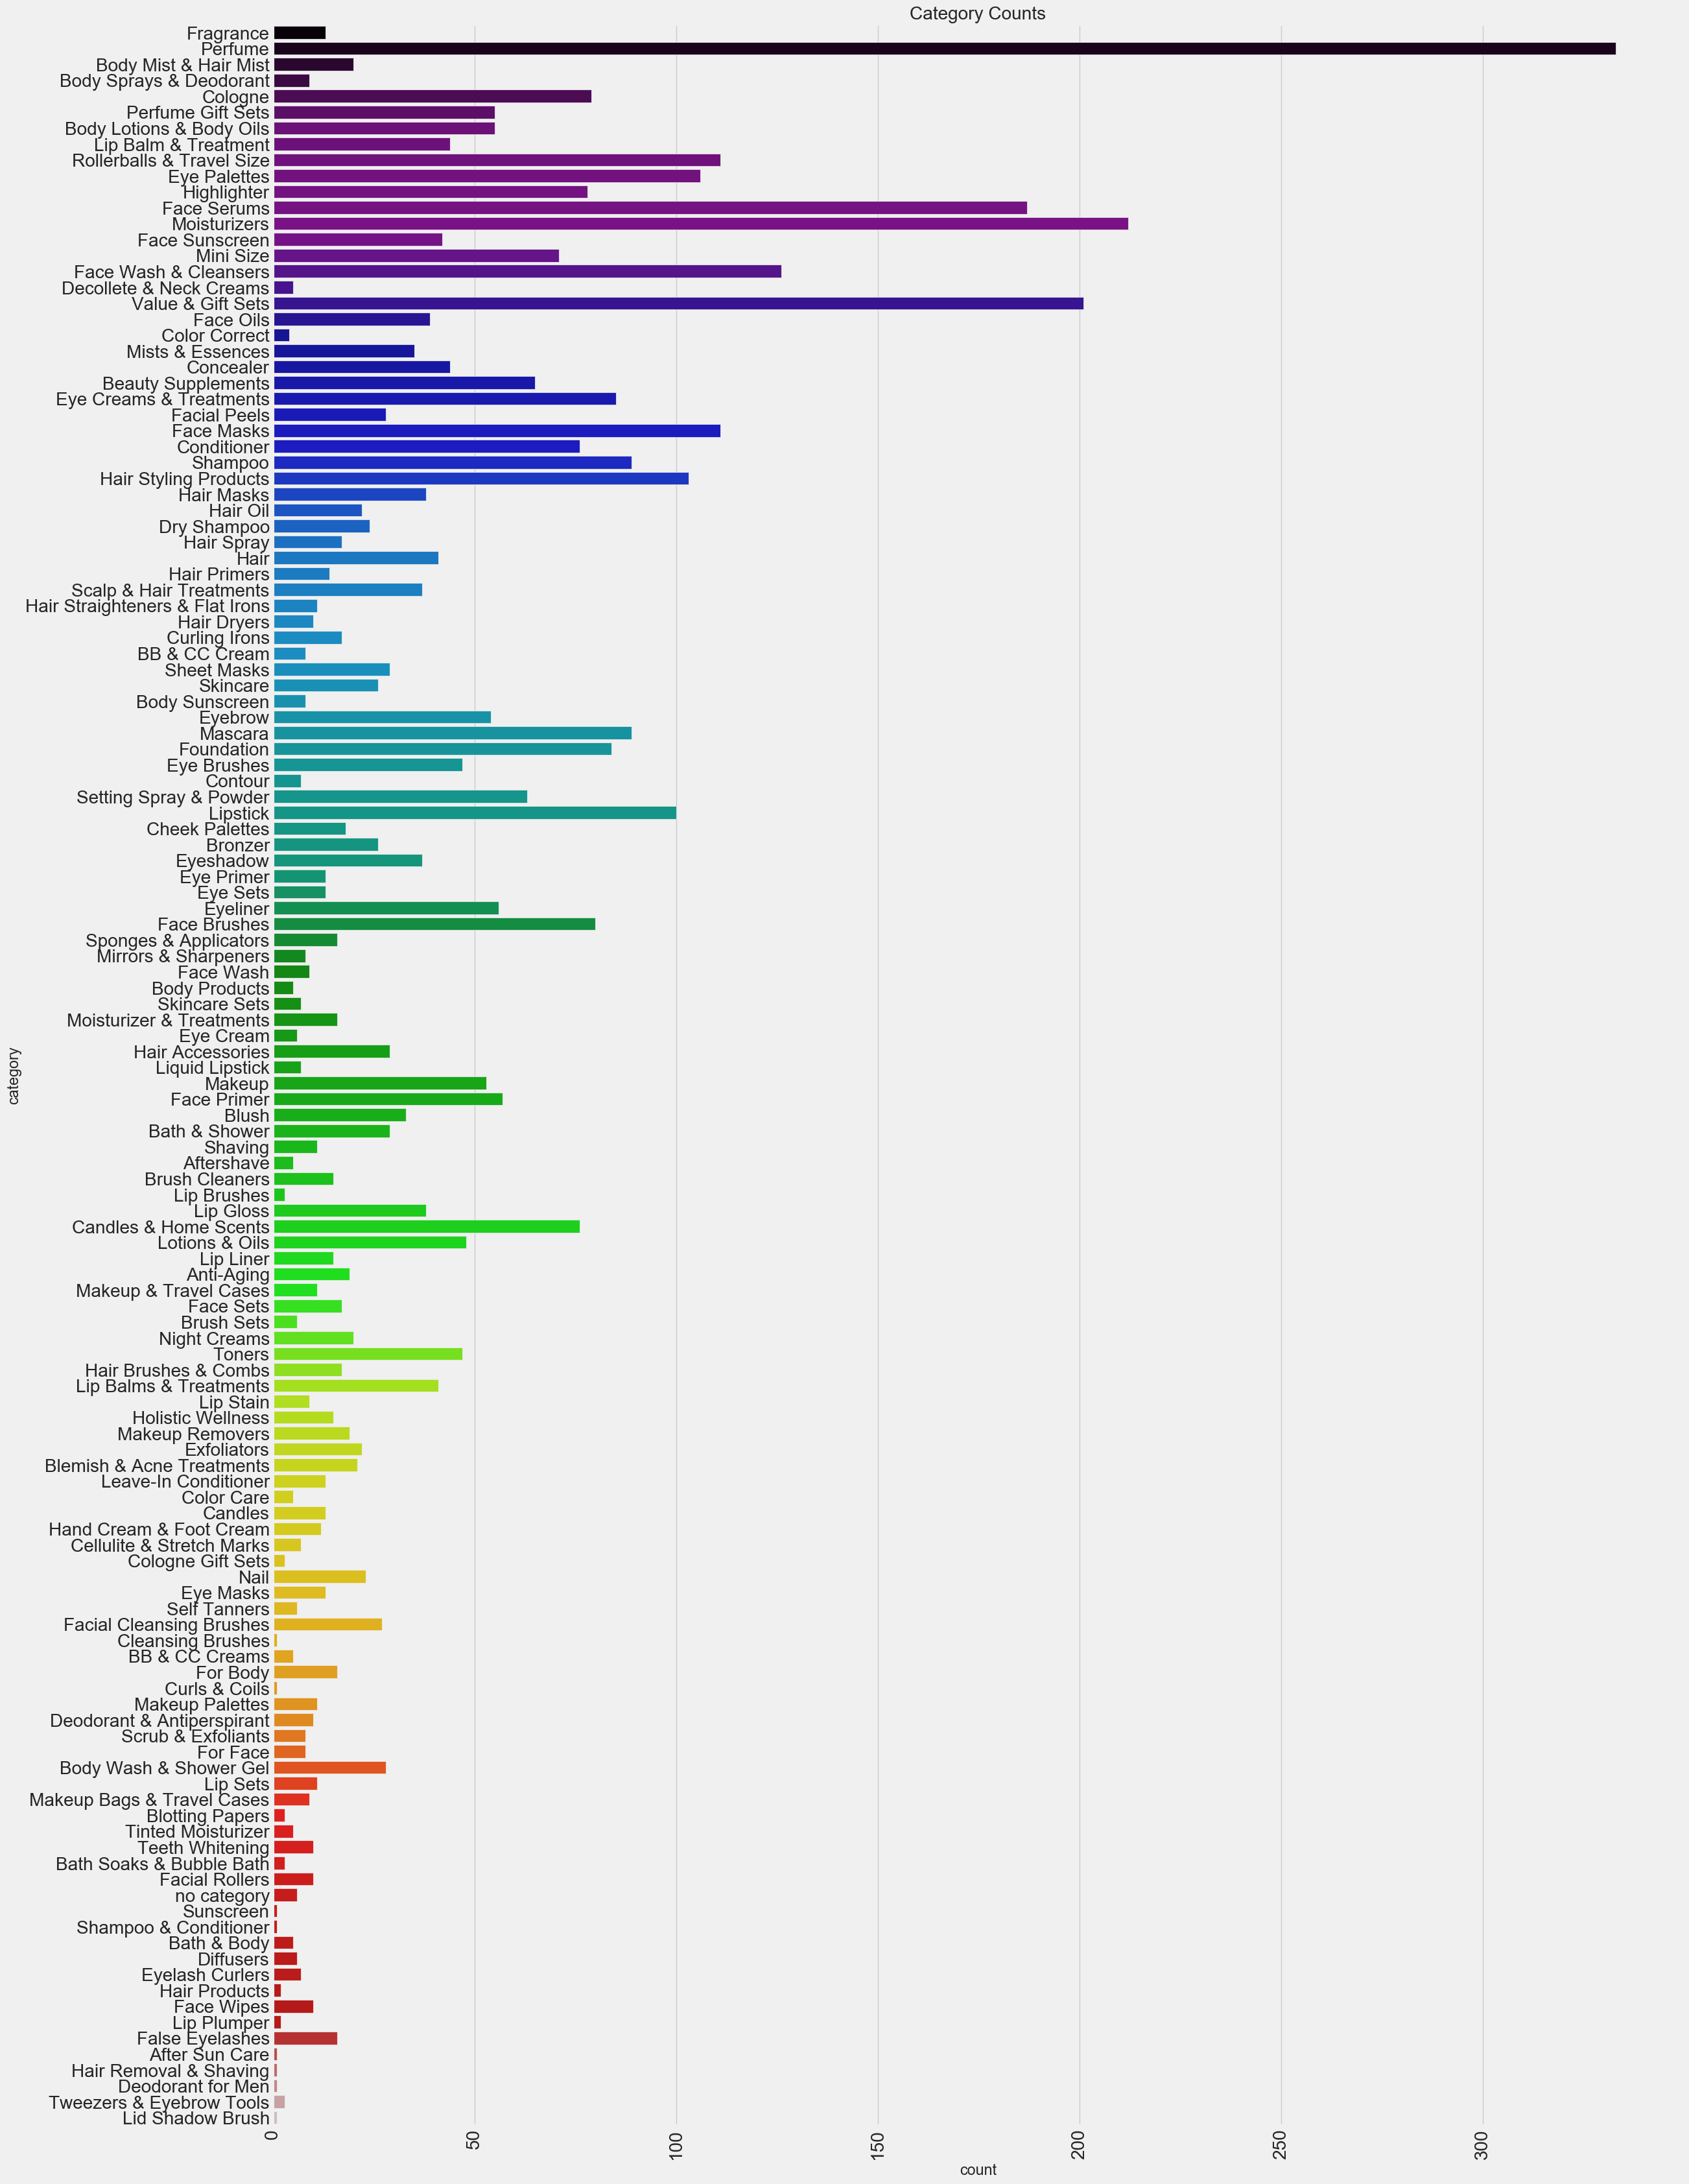

In [103]:
plt.figure(figsize=(25,40),dpi=100)
plt.xticks(rotation=90)
plt.title('Category Counts')
sns.countplot(y=data_2020['category'], palette="nipy_spectral");

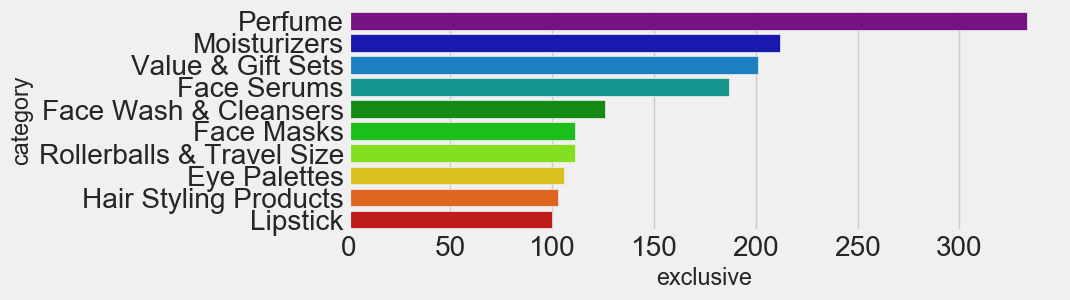

In [104]:
categorybig10 = data_2020.groupby(['category'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=categorybig10['category'],x=categorybig10['exclusive'], palette='nipy_spectral')

### What is the Rating With the Most Sales 2019

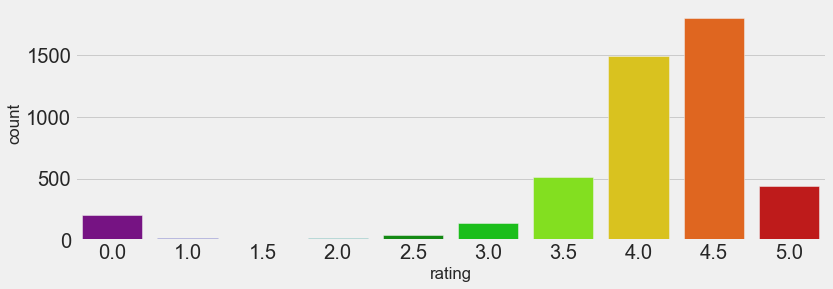

In [105]:
sns.countplot(data_2019['rating'],palette='nipy_spectral',orient='v')

### What is the Rating With the Most Sales 2020

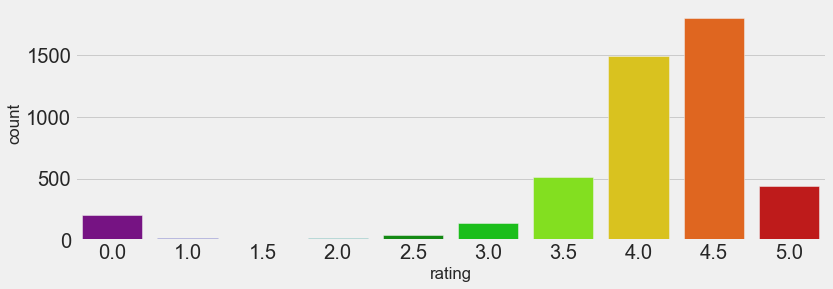

In [106]:
sns.countplot(data_2019['rating'],palette='nipy_spectral',orient='v')

## Data Preparation


Checking for Outliers

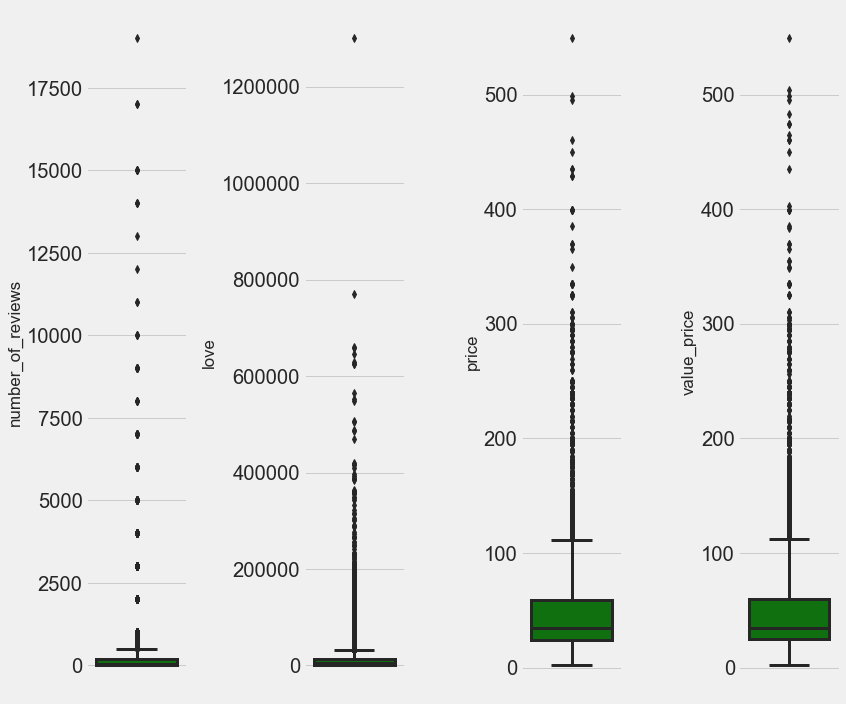

In [109]:
features = ['number_of_reviews','love','price','value_price']
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()


In [111]:
data['number_of_reviews'] = np.log1p(data['number_of_reviews'])
data['love'] = np.log1p(data['love'])
data['price'] = np.log1p(data['price'])
data['value_price'] = np.log1p(data['value_price'])

In [112]:
data['MarketingFlags'] = data.MarketingFlags.map({False:0, True:1})

### Finding most Important features

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = data_2019.drop('avg_rev', axis = 1) 
y = data_2019['avg_rev']
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [145]:
data_2019 = data_2019.drop(['id'],axis=1)
data_2019 = data_2019.drop(['name'],axis=1)
data_2019= data_2019.drop(['URL'],axis=1)
data_2019 = data_2019.drop(['options'],axis=1)
data_2019= data_2019.drop(['details'],axis=1)
data_2019 = data_2019.drop(['how_to_use'],axis=1)
data_2019 = data_2019.drop(['ingredients'],axis=1)
data_2019 = data_2019.drop(['price'],axis=1)
data_2019 = data_2019.drop(['year'],axis=1)


In [175]:
data_2019 = data_2019.drop(['year'],axis=1)
data_2019 = data_2019.drop(['month'],axis=1)
data_2019 = data_2019.drop(['size'],axis=1)

In [163]:
data_2019.head()

brand category           size  rating  number_of_reviews  love  \
1   Acqua Di Parma  Cologne  0.7 oz/ 20 mL     4.5                 76  2700   
3   Acqua Di Parma  Perfume  2.5 oz/ 74 mL     4.5                 23  2900   
5   Acqua Di Parma  Perfume   5 oz/ 148 mL     4.5                 79  2600   
7   Acqua Di Parma  Cologne  1.7 oz/ 50 mL     5.0                 13   719   
11  Acqua Di Parma  Perfume  2.5 oz/ 74 mL     4.5                 16  1900   

    value_price  MarketingFlags MarketingFlags_content  online_only  \
1          66.0            True            online only            1   
3         120.0            True            online only            1   
5         180.0            True            online only            1   
7         120.0            True            online only            1   
11        120.0           False                      0            0   

    exclusive  limited_edition  limited_time_offer  month  year  avg_rev  \
1           0                0                   0      8  2019    15477   
3           0                0                   0     11  2019    20116   
5           0                0                   0      9  2019    12571   
7           0                0                   0     12  2019    16388   
11          0                0                   0     12  2019    17176   

    items_sold  
1          937  
3          292  
5          399  
7         1204  
11        1192

In [164]:
data_2019['rating']=data_2019['rating'].astype(str)

In [169]:
# Get all the categorical columns
cat_cols = data_2019.select_dtypes("object").columns

## One-Hot Encoding all the categorical variables but dropping one of the features among them.
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(data_2019[i].unique()[-1]) ]

## Create dummy variables (One-Hot Encoding)
data_2019= pd.get_dummies(data_2019, columns=cat_cols) 

## Drop the last column generated from each categorical feature
data_2019.drop(drop_categ, axis=1, inplace=True)

In [181]:
data_2019

number_of_reviews  love  value_price  MarketingFlags  online_only  \
1                    76  2700         66.0            True            1   
3                    23  2900        120.0            True            1   
5                    79  2600        180.0            True            1   
7                    13   719        120.0            True            1   
11                   16  1900        120.0           False            0   
...                 ...   ...          ...             ...          ...   
9163                 15  6200          6.0            True            0   
9164                  0   266         27.0            True            0   
9165                  0   445         16.0            True            0   
9166                 46     0         50.0           False            0   
9167                  0     0         50.0           False            0   

      exclusive  limited_edition  limited_time_offer  avg_rev  items_sold  \
1             0                0                   0    15477         937   
3             0                0                   0    20116         292   
5             0                0                   0    12571         399   
7             0                0                   0    16388        1204   
11            0                0                   0    17176        1192   
...         ...              ...                 ...      ...         ...   
9163          1                1                   0    18672        1125   
9164          1                0                   0    11620        1710   
9165          1                0                   0     9357         296   
9166          0                0                   0    18571         330   
9167          0                0                   0    13398        1802   

      ...  rating_4.5  rating_5.0  MarketingFlags_content_0  \
1     ...           1           0                         0   
3     ...           1           0                         0   
5     ...           1           0                         0   
7     ...           0           1                         0   
11    ...           1           0                         1   
...   ...         ...         ...                       ...   
9163  ...           0           0                         0   
9164  ...           0           0                         0   
9165  ...           0           0                         0   
9166  ...           0           1                         1   
9167  ...           0           0                         1   

      MarketingFlags_content_exclusive  \
1                                    0   
3                                    0   
5                                    0   
7                                    0   
11                                   0   
...                                ...   
9163                                 0   
9164                                 1   
9165                                 1   
9166                                 0   
9167                                 0   

      MarketingFlags_content_exclusive · online only  \
1                                                  0   
3                                                  0   
5                                                  0   
7                                                  0   
11                                                 0   
...                                              ...   
9163                                               0   
9164                                               0   
9165                                               0   
9166                                               0   
9167                                               0   

      MarketingFlags_content_limited edition  \
1                                          0   
3                                          0   
5                                          0   
7                                          0   
11   

In [126]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [162]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score


In [183]:
X = data_2019.drop('value_price', axis = 1) 
y = data_2019['value_price']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [185]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred= RandomForest.predict(X_test)

print("Accuracy on Traing set   : ",RandomForest.score(X_train,y_train))
print("Accuracy on Testing set  : ",RandomForest.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.939366973463682
Accuracy on Testing set  :  0.5199378855499364
__________________________________________
		Error Table
Mean Absolute Error      :  16.72126143162393
Mean Squared Error       :  1062.506439077532
Root Mean Squared Error  :  32.59611079680415
R Squared Error          :  0.5199378855499364


In [186]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
df_imp = pd.DataFrame(xgb.feature_importances_ , columns = ['Importance'], index=X_train.columns)
df_imp = df_imp.sort_values(['Importance'], ascending = False)

df_imp.head()

Importance
category_Perfume                            0.059229
brand_ghd                                   0.058410
brand_dyson                                 0.049498
brand_Artis                                 0.042903
category_Hair Straighteners & Flat Irons    0.027968

In [187]:
XGB_model = XGBRegressor()

XGB_model.fit(X_train, y_train)
y_pred= XGB_model.predict(X_test)

print("Accuracy on Traing set   : ",XGB_model.score(X_train,y_train))
print("Accuracy on Testing set  : ",XGB_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set   :  0.9041062474312562
Accuracy on Testing set  :  0.5509147042272242
__________________________________________
		Error Table
Mean Absolute Error      :  17.499569662941827
Mean Squared  Error      :  993.9464167053038
Root Mean Squared Error  :  31.526915749963614
R Squared Error          :  0.5509147042272242
